In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
house = pd.read_csv("train.csv")

In [3]:
house.shape

(1460, 81)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## Initial data familiarization

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## Missing values imputation

In [11]:
# Identifying features with missing values
house.isnull().sum()[house.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
# Alley
house.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [13]:
house.Alley = house.Alley.fillna("NA")
house.Alley.value_counts()

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [14]:
# Masonry veneer type: MasVnrType
house.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [15]:
house.MasVnrType = house.MasVnrType.fillna("None")
house.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [16]:
# Masonry veneer area: MasVnrArea
house.MasVnrArea = house.MasVnrArea.fillna(0.0)

In [17]:
# Basement Variables
# Basement Quality
house.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [18]:
house.BsmtQual = house.BsmtQual.fillna("NA")
house.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [19]:
# Basement Condition
house.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [20]:
house.BsmtCond = house.BsmtCond.fillna("NA")
house.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [21]:
# Basement Exposure
house.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [22]:
house.BsmtExposure = house.BsmtExposure.fillna("NA")
house.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64

In [23]:
# Basement Finish Types
house.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [24]:
house.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [25]:
house.BsmtFinType1 = house.BsmtFinType1.fillna("NA")
house.BsmtFinType2 = house.BsmtFinType2.fillna("NA")

In [26]:
# Recheck remaining missing variables
house.isnull().sum()[house.isnull().sum()>0]

LotFrontage      259
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [27]:
# Electrical
house.Electrical.fillna(value = house.Electrical.mode()[0],inplace=True)
house.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [28]:
# Fireplace Quality
house.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [29]:
house.FireplaceQu.fillna("NA",inplace=True)
house.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [30]:
# Garage categorical variables
Garage = ["GarageType","GarageFinish","GarageQual","GarageCond"]
for g in Garage:
    print(house[g].value_counts())

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [31]:
# Imputing with "NA" 
for g in Garage:
    house[g].fillna("NA",inplace=True)
    print(house[g].value_counts())

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64
TA    1311
NA      81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [34]:
# Garage Year Built - Imputing with the minimum value in the column since the older the garage the lesser its value
# And if there is no garage, we can approximate it to being a really old garage for our analysis
house.GarageYrBlt.fillna(house.GarageYrBlt.min(),inplace=True)
house.GarageYrBlt.value_counts

<bound method IndexOpsMixin.value_counts of 0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64>

In [35]:
# Checking missing values again
house.isnull().sum()[house.isnull().sum()>0]

LotFrontage     259
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [36]:
# Pool Quality
house.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [37]:
house.PoolQC.fillna("NA",inplace=True)
house.PoolQC.value_counts()

NA    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

In [38]:
# Fence
house.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [39]:
house.Fence.fillna("NA",inplace=True)
house.Fence.value_counts()

NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [40]:
# Misc Feature
house.MiscFeature.fillna("NA",inplace=True)
house.MiscFeature.value_counts()

NA      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [41]:
house.isnull().sum()[house.isnull().sum()>0]

LotFrontage    259
dtype: int64

In [38]:
# Checking if there is a strong correlation between "LotFrontage" and "LotArea"
h2 = house[["LotFrontage","LotArea"]]
h2.corr()

LotFrontage   LotArea
LotFrontage     1.000000  0.426095
LotArea         0.426095  1.000000

#### There is no strong relationship as seen above. Hence, imputing missing values with median value of LotFrontage


In [44]:
house.LotFrontage.fillna(house.LotFrontage.median(),inplace=True)

In [45]:
house.isnull().sum()[house.isnull().sum()>0]

Series([], dtype: int64)

In [46]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### All missing values have been taken care of. In the interest of performing a fair analysis, no data has been discarded and a fair imputation has been done in the most logical manner

## Encoding and transforming variables to make them suitable for regression analysis

### Categorical Variables identification

In [47]:
# Listing out all string categorical variables
cat_list = house.select_dtypes(include="object").columns
cat_list

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:
print("Number of categorical features known (at the moment): ",len(cat_list))

Number of categorical features known (at the moment):  43


In [50]:
house.MSSubClass.dtype

dtype('int64')

#### From the data description, it is obvious that the feature "MSSubClass" is an unordered categorical variable, even though numeric codes have been assigned to each of the categories. Hence, converting the codes to string.

In [51]:
house.MSSubClass = house.MSSubClass.astype("object")
house.MSSubClass.dtype

dtype('O')

In [52]:
# Listing out all string categorical variables again
cat_list = house.select_dtypes(include="object").columns
cat_list

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [53]:
print("Number of categorical features known: ",len(cat_list))

Number of categorical features known:  44


#### Based on the data description, we can segregate the categorical variables into:
- Ordered Categorical features: Suitable for ordered encoding
- Unordered Categorical features: Suitable for dummy encoding

Most of the unordered variables do have some sort of ordering, but the order is not known due to lack of domain knowledge and hence classified as unordered.

In [54]:
cat_unordered = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
                 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation','Heating','Electrical', 'Functional',
                 'GarageType','MiscFeature','SaleType', 'SaleCondition']
cat_ordered1 = ["Alley","Utilities",'BsmtExposure','BsmtFinType1','BsmtFinType2','GarageFinish','PavedDrive',
                'Fence']
cat_ordered2_quality = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
                        'GarageQual', 'GarageCond','PoolQC']
cat_binary =["Street",'CentralAir']

print("Number of unordered features: ",len(cat_unordered))
print("Number of ordered features not pertaining to quality: ",len(cat_ordered1))
print("Number of ordered features pertaining to quality: ",len(cat_ordered2_quality))
print("Number of features with binary options: ",len(cat_binary))
print("Total number of categorical variables: ",len(cat_unordered)+len(cat_ordered1)+len(cat_ordered2_quality)+len(cat_binary))

Number of unordered features:  24
Number of ordered features not pertaining to quality:  8
Number of ordered features pertaining to quality:  10
Number of features with binary options:  2
Total number of categorical variables:  44


### Numeric variables identification

In [55]:
# Dropping the "Id" column because it serves no purposse
house.drop("Id",axis=1,inplace=True)

In [59]:
print("Number of features: ", house.shape[1])

Number of features:  80


In [60]:
# Integer variables identification
num_list = house.select_dtypes(include="int64").columns
print("Integer variabes:\n",num_list,"\nNumber of integer variables: ",len(num_list))

Integer variabes:
 Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 
Number of integer variables:  33


In [61]:
num_list2 = house.select_dtypes(include="float64").columns
print("Floating point variabes:\n",num_list2,"\nNumber of floating point variables: ",len(num_list2))

Floating point variabes:
 Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object') 
Number of floating point variables:  3


#### Based on the data description, we can segregate the numeric variables into:
- Numerical features representing quality or having some order: No scaling to be performed
- Standard numerical variables: Scaling necessary
- Date variables: To be used to obtain age of the house etc.

In [62]:
to_scale =['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
           '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal','SalePrice']
other_num = ['OverallQual', 'OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
date_vars = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','MoSold', 'YrSold']
print("Number of numeric variables requiring scaling: ",len(to_scale))
print("Number of numeric variables to be used as is: ",len(other_num))
print("Number of date related variables: ",len(date_vars))
print ("Total number of numeric variables: ", len(to_scale)+len(other_num)+len(date_vars))

Number of numeric variables requiring scaling:  20
Number of numeric variables to be used as is:  11
Number of date related variables:  5
Total number of numeric variables:  36


### Encoding ordered categorical features not related to quality

In [63]:
# Displaying available values for the various features in this list
for i in cat_ordered1:
    print(i,house[i].unique())

Alley ['NA' 'Grvl' 'Pave']
Utilities ['AllPub' 'NoSeWa']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' 'NA']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']
GarageFinish ['RFn' 'Unf' 'Fin' 'NA']
PavedDrive ['Y' 'N' 'P']
Fence ['NA' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


#### These variables will be encoded in a logical manner with higher the encoded value representing better the feature is.
#### The data description was referred to when deciding the order of the values.

In [64]:
# Ordered Categorical variables list1
house.Alley = house.Alley.map({"NA":0,"Grvl":1,"Pave":2})
house.Utilities = house.Utilities.map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1,'ELO':0})
house.BsmtExposure = house.BsmtExposure.map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0})
house.BsmtFinType1 = house.BsmtFinType1.map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})
house.BsmtFinType2 = house.BsmtFinType2.map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})
house.GarageFinish = house.GarageFinish.map({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})
house.PavedDrive = house.PavedDrive.map({"N":0,"P":1,"Y":2})
house.Fence = house.Fence.map({'NA':0, 'MnPrv':3, 'GdWo':2, 'GdPrv':4, 'MnWw':1})

In [65]:
house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  Alley LotShape  \
0         60       RL         65.0     8450   Pave      0      Reg   
1         20       RL         80.0     9600   Pave      0      Reg   
2         60       RL         68.0    11250   Pave      0      IR1   
3         70       RL         60.0     9550   Pave      0      IR1   
4         60       RL         84.0    14260   Pave      0      IR1   

  LandContour  Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl          3    Inside       Gtl      CollgCr       Norm   
1         Lvl          3       FR2       Gtl      Veenker      Feedr   
2         Lvl          3    Inside       Gtl      CollgCr       Norm   
3         Lvl          3    Corner       Gtl      Crawfor       Norm   
4         Lvl          3       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA             1   
1         0.0        TA        TA     CBlock       Gd       TA             4   
2       162.0        Gd        TA      PConc       Gd       TA             2   
3         0.0        TA        TA     BrkTil       TA       Gd             1   
4       350.0        Gd        TA      PConc       Gd       TA             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             6         706             1           0        150          856   
1             5         978             1           0        284         1262   
2             6         486             1           0        434          920   
3             5         216             1           0        540          756   
4             6         655             1           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd           

In [66]:
# Checking if the encoding worked
for i in cat_ordered1:
    print(house[i].value_counts())

0    1369
1      50
2      41
Name: Alley, dtype: int64
3    1459
1       1
Name: Utilities, dtype: int64
1    953
3    221
4    134
2    114
0     38
Name: BsmtExposure, dtype: int64
1    430
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64
1    1256
3      54
2      46
0      38
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64
1    605
2    422
3    352
0     81
Name: GarageFinish, dtype: int64
2    1340
0      90
1      30
Name: PavedDrive, dtype: int64
0    1179
3     157
4      59
2      54
1      11
Name: Fence, dtype: int64


### Encoding binary categorical variables

In [67]:
for i in cat_binary:
    print(i,house[i].unique())

Street ['Pave' 'Grvl']
CentralAir ['Y' 'N']


In [68]:
house.Street = house.Street.map({"Pave":1,"Grvl":0})
house.CentralAir = house.CentralAir.map({'Y':1,'N':0})

### Encoding ordered categorical features pertaining to quality. All these features have the same description and ordering of the values.

In [70]:
for i in cat_ordered2_quality:
    print(i,house[i].unique())
    print(house[i].value_counts())

ExterQual ['Gd' 'TA' 'Ex' 'Fa']
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
BsmtQual ['Gd' 'TA' 'Ex' 'NA' 'Fa']
TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64
BsmtCond ['TA' 'Gd' 'NA' 'Fa' 'Po']
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
KitchenQual ['Gd' 'TA' 'Ex' 'Fa']
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
FireplaceQu ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
GarageQual ['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
TA    1311
NA      81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
GarageCond ['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']

In [71]:
# Encoding quality variables
for i in cat_ordered2_quality:
    house[i] = house[i].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [72]:
# Checking if the encoding worked
for i in cat_ordered2_quality:
    print(house[i].value_counts())

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64
3    1282
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64
3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64
3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64
5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64
3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64
0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64
3    1311
0      81
2      48
4      14
1       3
5       3
Name: GarageQual, dtype: int64
3    1326
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64
0    1453
4       3
2       2
5       2
Name: PoolQC, dtype: int64


In [73]:
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley LotShape  \
0         60       RL         65.0     8450       1      0      Reg   
1         20       RL         80.0     9600       1      0      Reg   
2         60       RL         68.0    11250       1      0      IR1   
3         70       RL         60.0     9550       1      0      IR1   
4         60       RL         84.0    14260       1      0      IR1   

  LandContour  Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl          3    Inside       Gtl      CollgCr       Norm   
1         Lvl          3       FR2       Gtl      Veenker      Feedr   
2         Lvl          3    Inside       Gtl      CollgCr       Norm   
3         Lvl          3    Corner       Gtl      Crawfor       Norm   
4         Lvl          3       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       196.0          4          3      PConc         4         3   
1         0.0          3          3     CBlock         4         3   
2       162.0          4          3      PConc         4         3   
3         0.0          3          3     BrkTil         3         4   
4       350.0          4          3      PConc         4         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6         706             1           0   
1             4             5         978             1           0   
2             2             6         486             1           0   
3             1             5         216             1           0   
4             3             6         655             1           0   

   BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  CentralAir Electrical  1stFlrSF  \
0        150          856    GasA          5           1      SBrkr       856   
1        284         1262    GasA          5           1      SBrkr      1262   
2        434          920    GasA          5           1      SBrkr       920   
3        540          756    GasA          4           1      SBrkr       961   
4        490         1145    GasA          5           1      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1            4             8        Typ   
1         0             3             1            3             6        Typ   
2         1             3             1            4             6        Typ   
3         0             3             1            4             7        Typ   
4         1             4             1            4   

### Using date variables to create new features pertaining to age which will likely be more useful.

In [74]:
house[date_vars].describe()

YearBuilt  YearRemodAdd  GarageYrBlt       MoSold       YrSold
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000
mean   1971.267808   1984.865753  1974.150685     6.321918  2007.815753
std      30.202904     20.645407    29.982047     2.703626     1.328095
min    1872.000000   1950.000000  1900.000000     1.000000  2006.000000
25%    1954.000000   1967.000000  1958.000000     5.000000  2007.000000
50%    1973.000000   1994.000000  1977.000000     6.000000  2008.000000
75%    2000.000000   2004.000000  2001.000000     8.000000  2009.000000
max    2010.000000   2010.000000  2010.000000    12.000000  2010.000000

In [75]:
# Converting GarageYrBlt to an integer value.
house.GarageYrBlt = house.GarageYrBlt.apply(lambda x:int(x))
house.GarageYrBlt.dtype

dtype('int64')

In [76]:
# Creating "Age" related variables.
house["Age"] = house.YrSold - house.YearBuilt
house["Time_Remod"] = house.YrSold - house.YearRemodAdd
house["Garage_Age"] = house.YrSold - house.GarageYrBlt

In [77]:
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley LotShape  \
0         60       RL         65.0     8450       1      0      Reg   
1         20       RL         80.0     9600       1      0      Reg   
2         60       RL         68.0    11250       1      0      IR1   
3         70       RL         60.0     9550       1      0      IR1   
4         60       RL         84.0    14260       1      0      IR1   

  LandContour  Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl          3    Inside       Gtl      CollgCr       Norm   
1         Lvl          3       FR2       Gtl      Veenker      Feedr   
2         Lvl          3    Inside       Gtl      CollgCr       Norm   
3         Lvl          3    Corner       Gtl      Crawfor       Norm   
4         Lvl          3       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       196.0          4          3      PConc         4         3   
1         0.0          3          3     CBlock         4         3   
2       162.0          4          3      PConc         4         3   
3         0.0          3          3     BrkTil         3         4   
4       350.0          4          3      PConc         4         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6         706             1           0   
1             4             5         978             1           0   
2             2             6         486             1           0   
3             1             5         216             1           0   
4             3             6         655             1           0   

   BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  CentralAir Electrical  1stFlrSF  \
0        150          856    GasA          5           1      SBrkr       856   
1        284         1262    GasA          5           1      SBrkr      1262   
2        434          920    GasA          5           1      SBrkr       920   
3        540          756    GasA          4           1      SBrkr       961   
4        490         1145    GasA          5           1      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1            4             8        Typ   
1         0             3             1            3             6        Typ   
2         1             3             1            4             6        Typ   
3         0             3             1            4             7        Typ   
4         1             4             1            4   

In [78]:
date_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [79]:
# Dropping original date variables which won't be used anymore.
house.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'],axis=1,inplace=True)

In [80]:
house.shape

(1460, 78)

In [81]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  RoofStyl

In [82]:
house.head()

MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley LotShape  \
0         60       RL         65.0     8450       1      0      Reg   
1         20       RL         80.0     9600       1      0      Reg   
2         60       RL         68.0    11250       1      0      IR1   
3         70       RL         60.0     9550       1      0      IR1   
4         60       RL         84.0    14260       1      0      IR1   

  LandContour  Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl          3    Inside       Gtl      CollgCr       Norm   
1         Lvl          3       FR2       Gtl      Veenker      Feedr   
2         Lvl          3    Inside       Gtl      CollgCr       Norm   
3         Lvl          3    Corner       Gtl      Crawfor       Norm   
4         Lvl          3       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0          4          3   
1     MetalSd     MetalSd       None         0.0          3          3   
2     VinylSd     VinylSd    BrkFace       162.0          4          3   
3     Wd Sdng     Wd Shng       None         0.0          3          3   
4     VinylSd     VinylSd    BrkFace       350.0          4          3   

  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0      PConc         4         3             1             6         706   
1     CBlock         4         3             4             5         978   
2      PConc         4         3             2             6         486   
3     BrkTil         3         4             1             5         216   
4      PConc         4         3             3             6         655   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
0             1           0        150          856    GasA          5   
1             1           0        284         1262    GasA          5   
2             1           0        434          920    GasA          5   
3             1           0        540          756    GasA          4   
4             1           0        490         1145    GasA          5   

   CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           1      SBrkr       856       854             0       1710   
1           1      SBrkr      1262         0             0       1262   
2           1      SBrkr       920       866             0       1786   
3           1      SBrkr       961       756             0       1717   
4           1      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd Functional  Fireplaces  FireplaceQu GarageType  \
0            4             8        Typ           0            0     Attchd   
1            3             6        Typ           1            3     Attchd   
2            4             6        Typ           1            3     Attchd   
3            4             7        Typ           1            4  

In [84]:
# Making a backup of the dataframe
house2 = house.copy()
print(house2.shape)
house2.head()

(1460, 78)


MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley LotShape  \
0         60       RL         65.0     8450       1      0      Reg   
1         20       RL         80.0     9600       1      0      Reg   
2         60       RL         68.0    11250       1      0      IR1   
3         70       RL         60.0     9550       1      0      IR1   
4         60       RL         84.0    14260       1      0      IR1   

  LandContour  Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl          3    Inside       Gtl      CollgCr       Norm   
1         Lvl          3       FR2       Gtl      Veenker      Feedr   
2         Lvl          3    Inside       Gtl      CollgCr       Norm   
3         Lvl          3    Corner       Gtl      Crawfor       Norm   
4         Lvl          3       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0          4          3   
1     MetalSd     MetalSd       None         0.0          3          3   
2     VinylSd     VinylSd    BrkFace       162.0          4          3   
3     Wd Sdng     Wd Shng       None         0.0          3          3   
4     VinylSd     VinylSd    BrkFace       350.0          4          3   

  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0      PConc         4         3             1             6         706   
1     CBlock         4         3             4             5         978   
2      PConc         4         3             2             6         486   
3     BrkTil         3         4             1             5         216   
4      PConc         4         3             3             6         655   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
0             1           0        150          856    GasA          5   
1             1           0        284         1262    GasA          5   
2             1           0        434          920    GasA          5   
3             1           0        540          756    GasA          4   
4             1           0        490         1145    GasA          5   

   CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           1      SBrkr       856       854             0       1710   
1           1      SBrkr      1262         0             0       1262   
2           1      SBrkr       920       866             0       1786   
3           1      SBrkr       961       756             0       1717   
4           1      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd Functional  Fireplaces  FireplaceQu GarageType  \
0            4             8        Typ           0            0     Attchd   
1            3             6        Typ           1            3     Attchd   
2            4             6        Typ           1            3     Attchd   
3            4             7        Typ           1            4  

<AxesSubplot:>

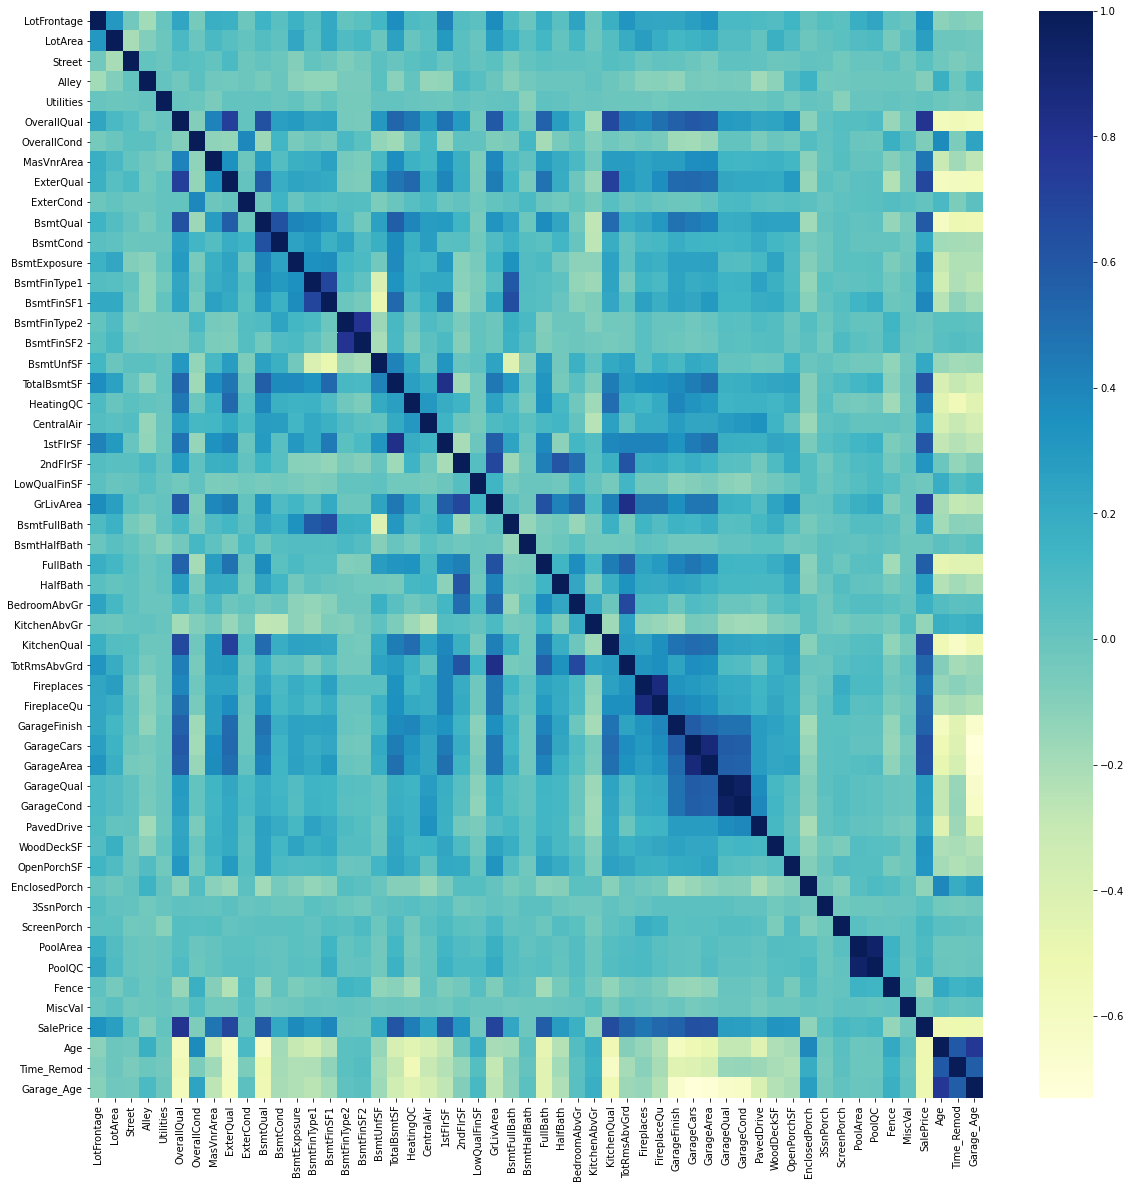

In [85]:
plt.figure(figsize=(20,20))
sns.heatmap(house.corr(),cmap="YlGnBu")

#### We can already see that the target variable "SalePrice" has a high positive correlation with variables like "OverallQual","GrLivArea","1stFlrSF", etc. and has a high negative correlation with "Age" variables, which is expected.

### Dummy encoding of unordered categorical variables

In [86]:
# Dropping the first value during dummy encoding, since 
dummy = pd.get_dummies(house[cat_unordered],drop_first=True)

In [87]:
house = pd.concat([house,dummy],axis=1)
house.shape

(1460, 245)

In [88]:
# Dropping original unordered categorical variables
house.drop(cat_unordered,axis=1,inplace = True)

In [89]:
house.shape

(1460, 221)

#### We can see that the number of features has increased significantly to 220, excluding our Target variable (SalePrice)

#### This concludes most of our encoding steps. 
#### Scaling of the relevant numeric variables would be performed after the train-test split.

In [90]:
house.head()

LotFrontage  LotArea  Street  Alley  Utilities  OverallQual  OverallCond  \
0         65.0     8450       1      0          3            7            5   
1         80.0     9600       1      0          3            6            8   
2         68.0    11250       1      0          3            7            5   
3         60.0     9550       1      0          3            7            5   
4         84.0    14260       1      0          3            8            5   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       196.0          4          3         4         3             1   
1         0.0          3          3         4         3             4   
2       162.0          4          3         4         3             2   
3         0.0          3          3         3         4             1   
4       350.0          4          3         4         3             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             6         706             1           0        150          856   
1             5         978             1           0        284         1262   
2             6         486             1           0        434          920   
3             5         216             1           0        540          756   
4             6         655             1           0        490         1145   

   HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          5           1       856       854             0       1710   
1          5           1      1262         0             0       1262   
2          5           1       920       866             0       1786   
3          4           1       961       756             0       1717   
4          5           1      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageFinish  \
0            4             8           0            0             2   
1            3             6           1            3             2   
2            4             6           1            3             2   
3            4             7           1            4             1   
4            4             9           1            3             2   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0           2         548           3           3           2           0   
1           2         460           3           3           2         298   
2           2         608           3           3           2           0   
3           3         642           3           3           2           0   
4           3         836           3           3           2         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0           61              0          0            0         0       0   
1            0              0          0            0         0       0   
2           42              0          0            0         0       0   
3           35            272          0            0         0       0   
4           84              0          0            0         0       0   

   Fence  MiscVal  SalePrice  Age  Time_Remod  Garage_Age  MSSubClass_30  \
0      0        0     208500    5           5           5              0   
1      0        0     181500   31          31          31              0   
2      0        0     223500    7           6           7              0   
3      0        0     140000   

In [91]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 221 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(52), uint8(167)
memory usage: 854.2 KB


#### All variables are now numeric in nature and suitable for regression analysis.

#### Let's look at some distribution plots to get a better feel of the data

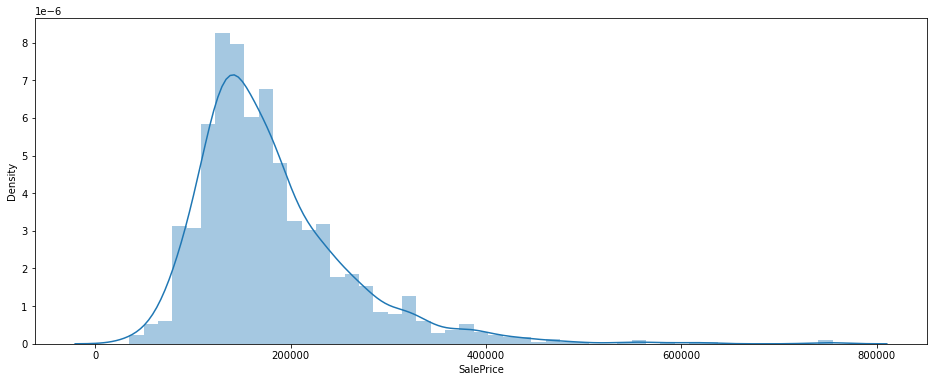

In [92]:
# Distribution of target variable
plt.figure(figsize=(16,6))
sns.distplot(house.SalePrice)
plt.show()

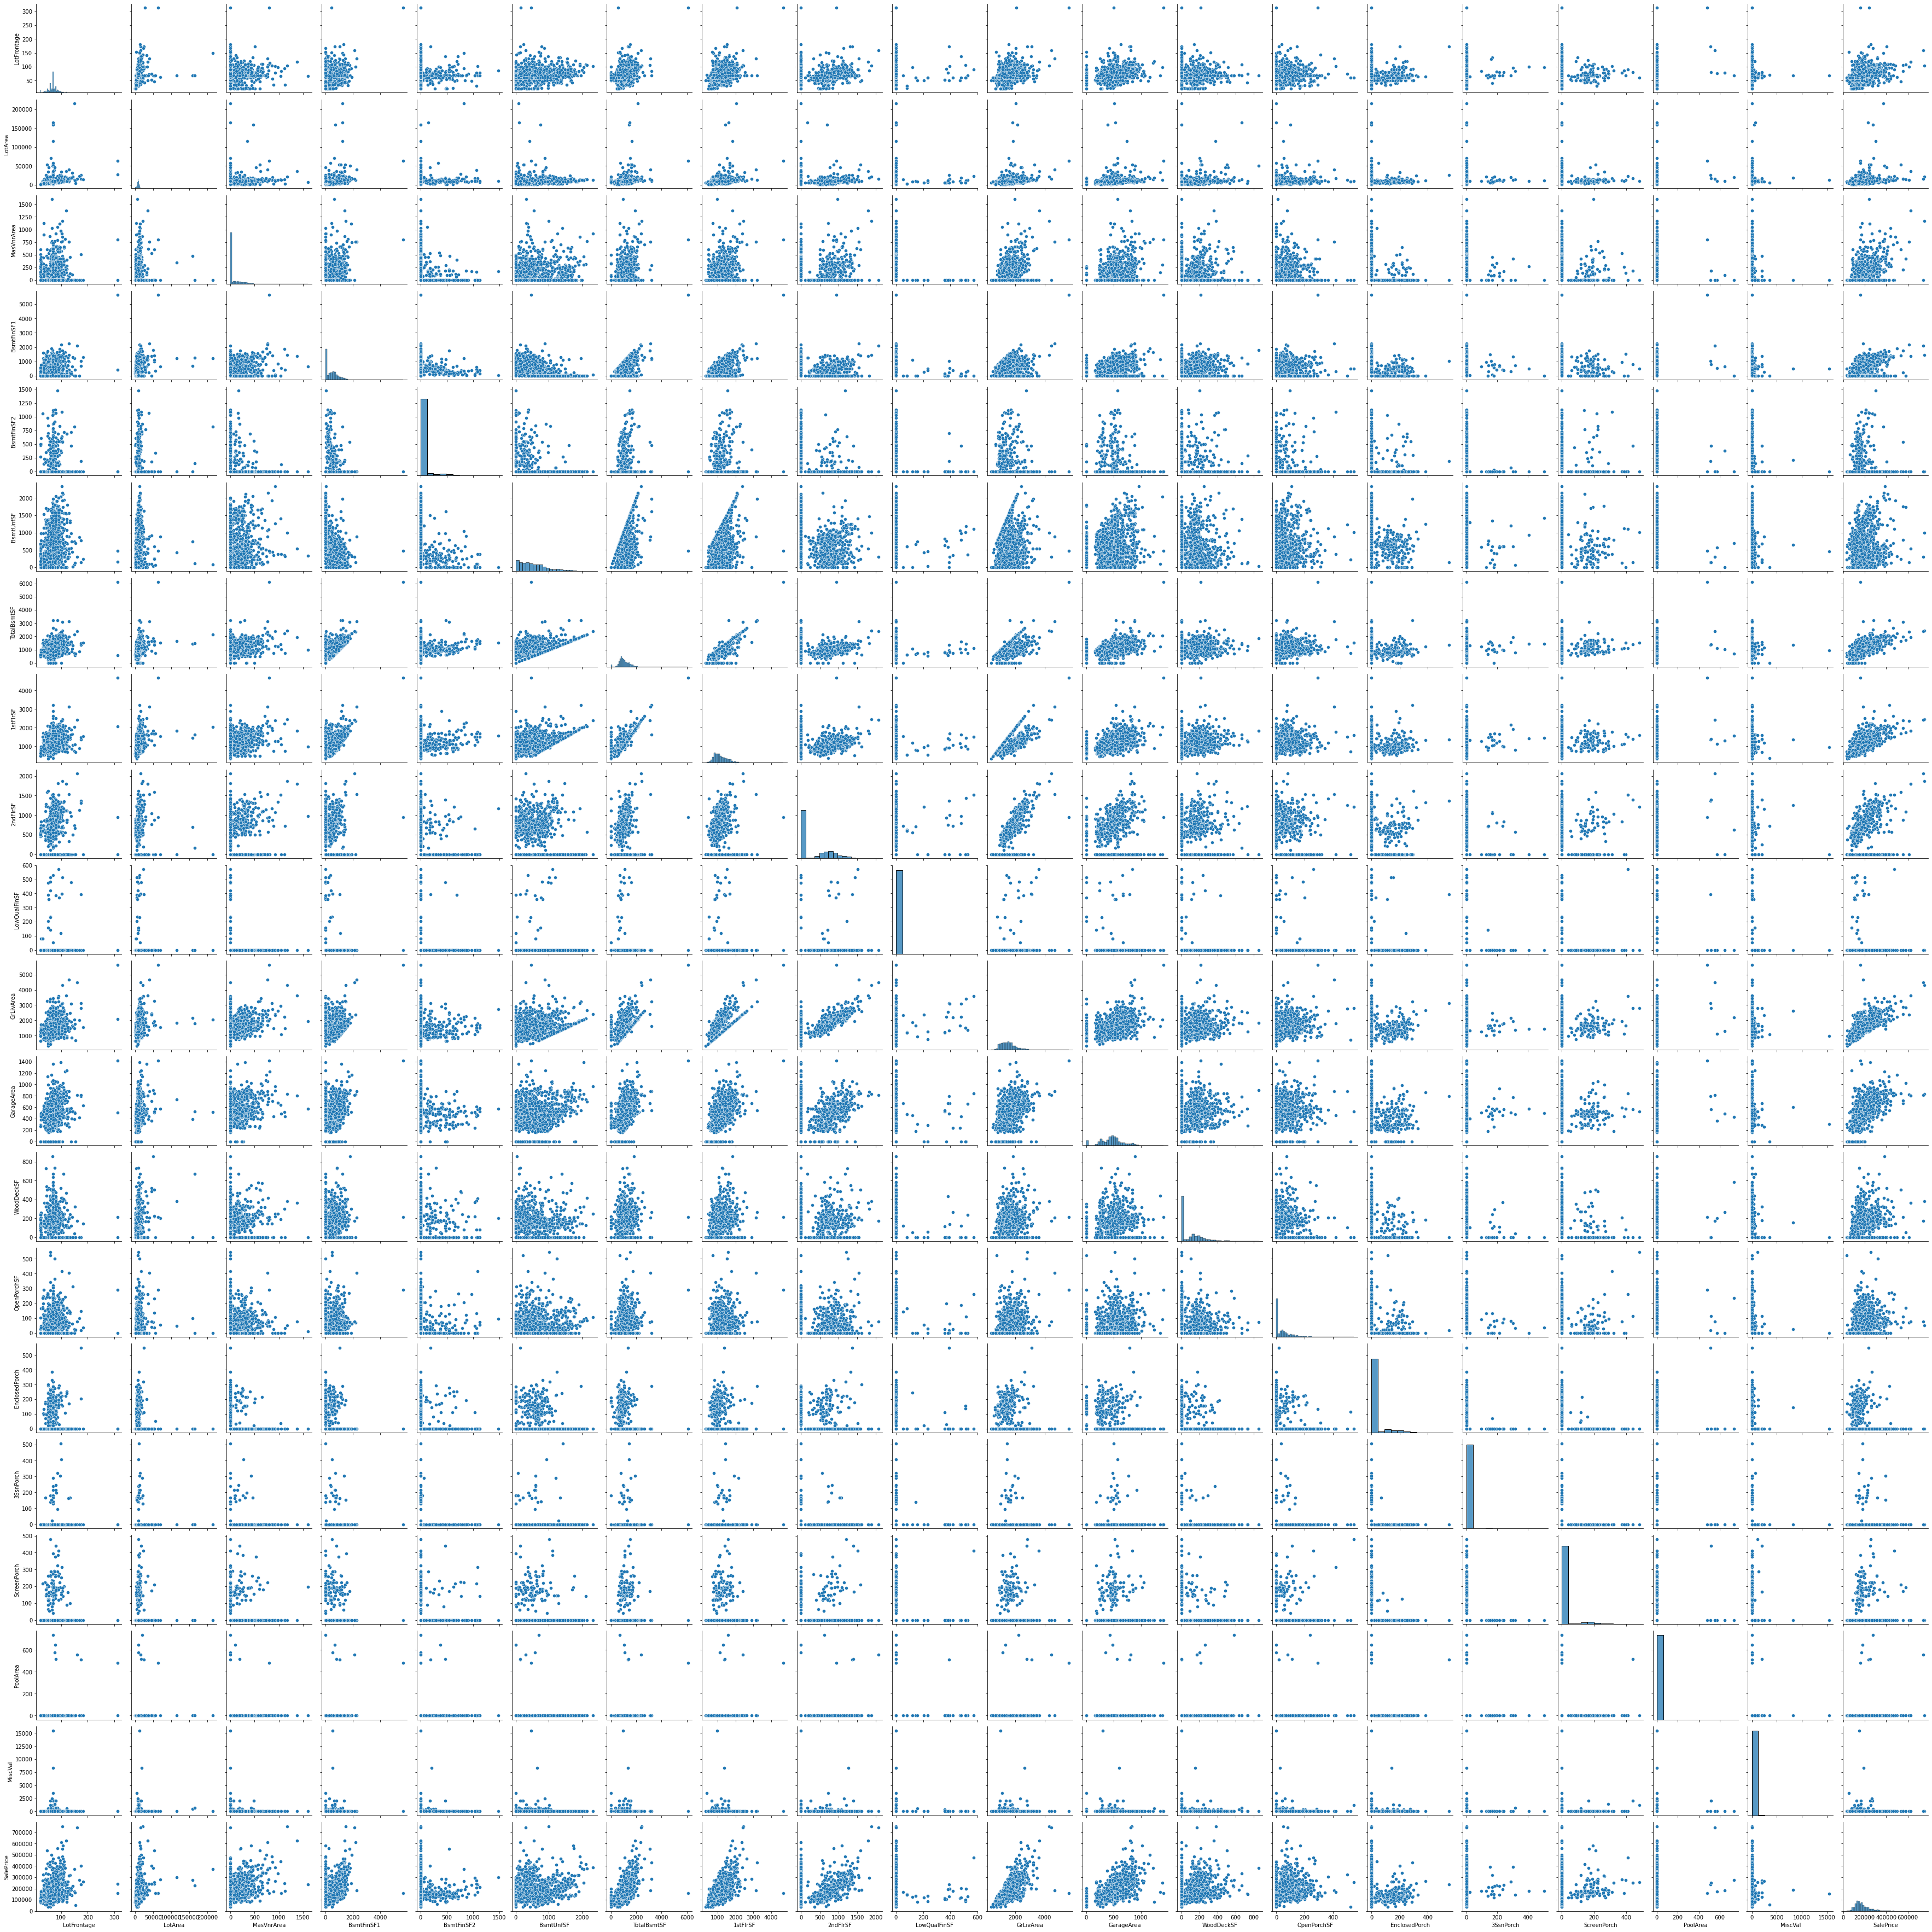

In [93]:
# Distribution with respect to unscaled variables
sns.pairplot(house[to_scale])

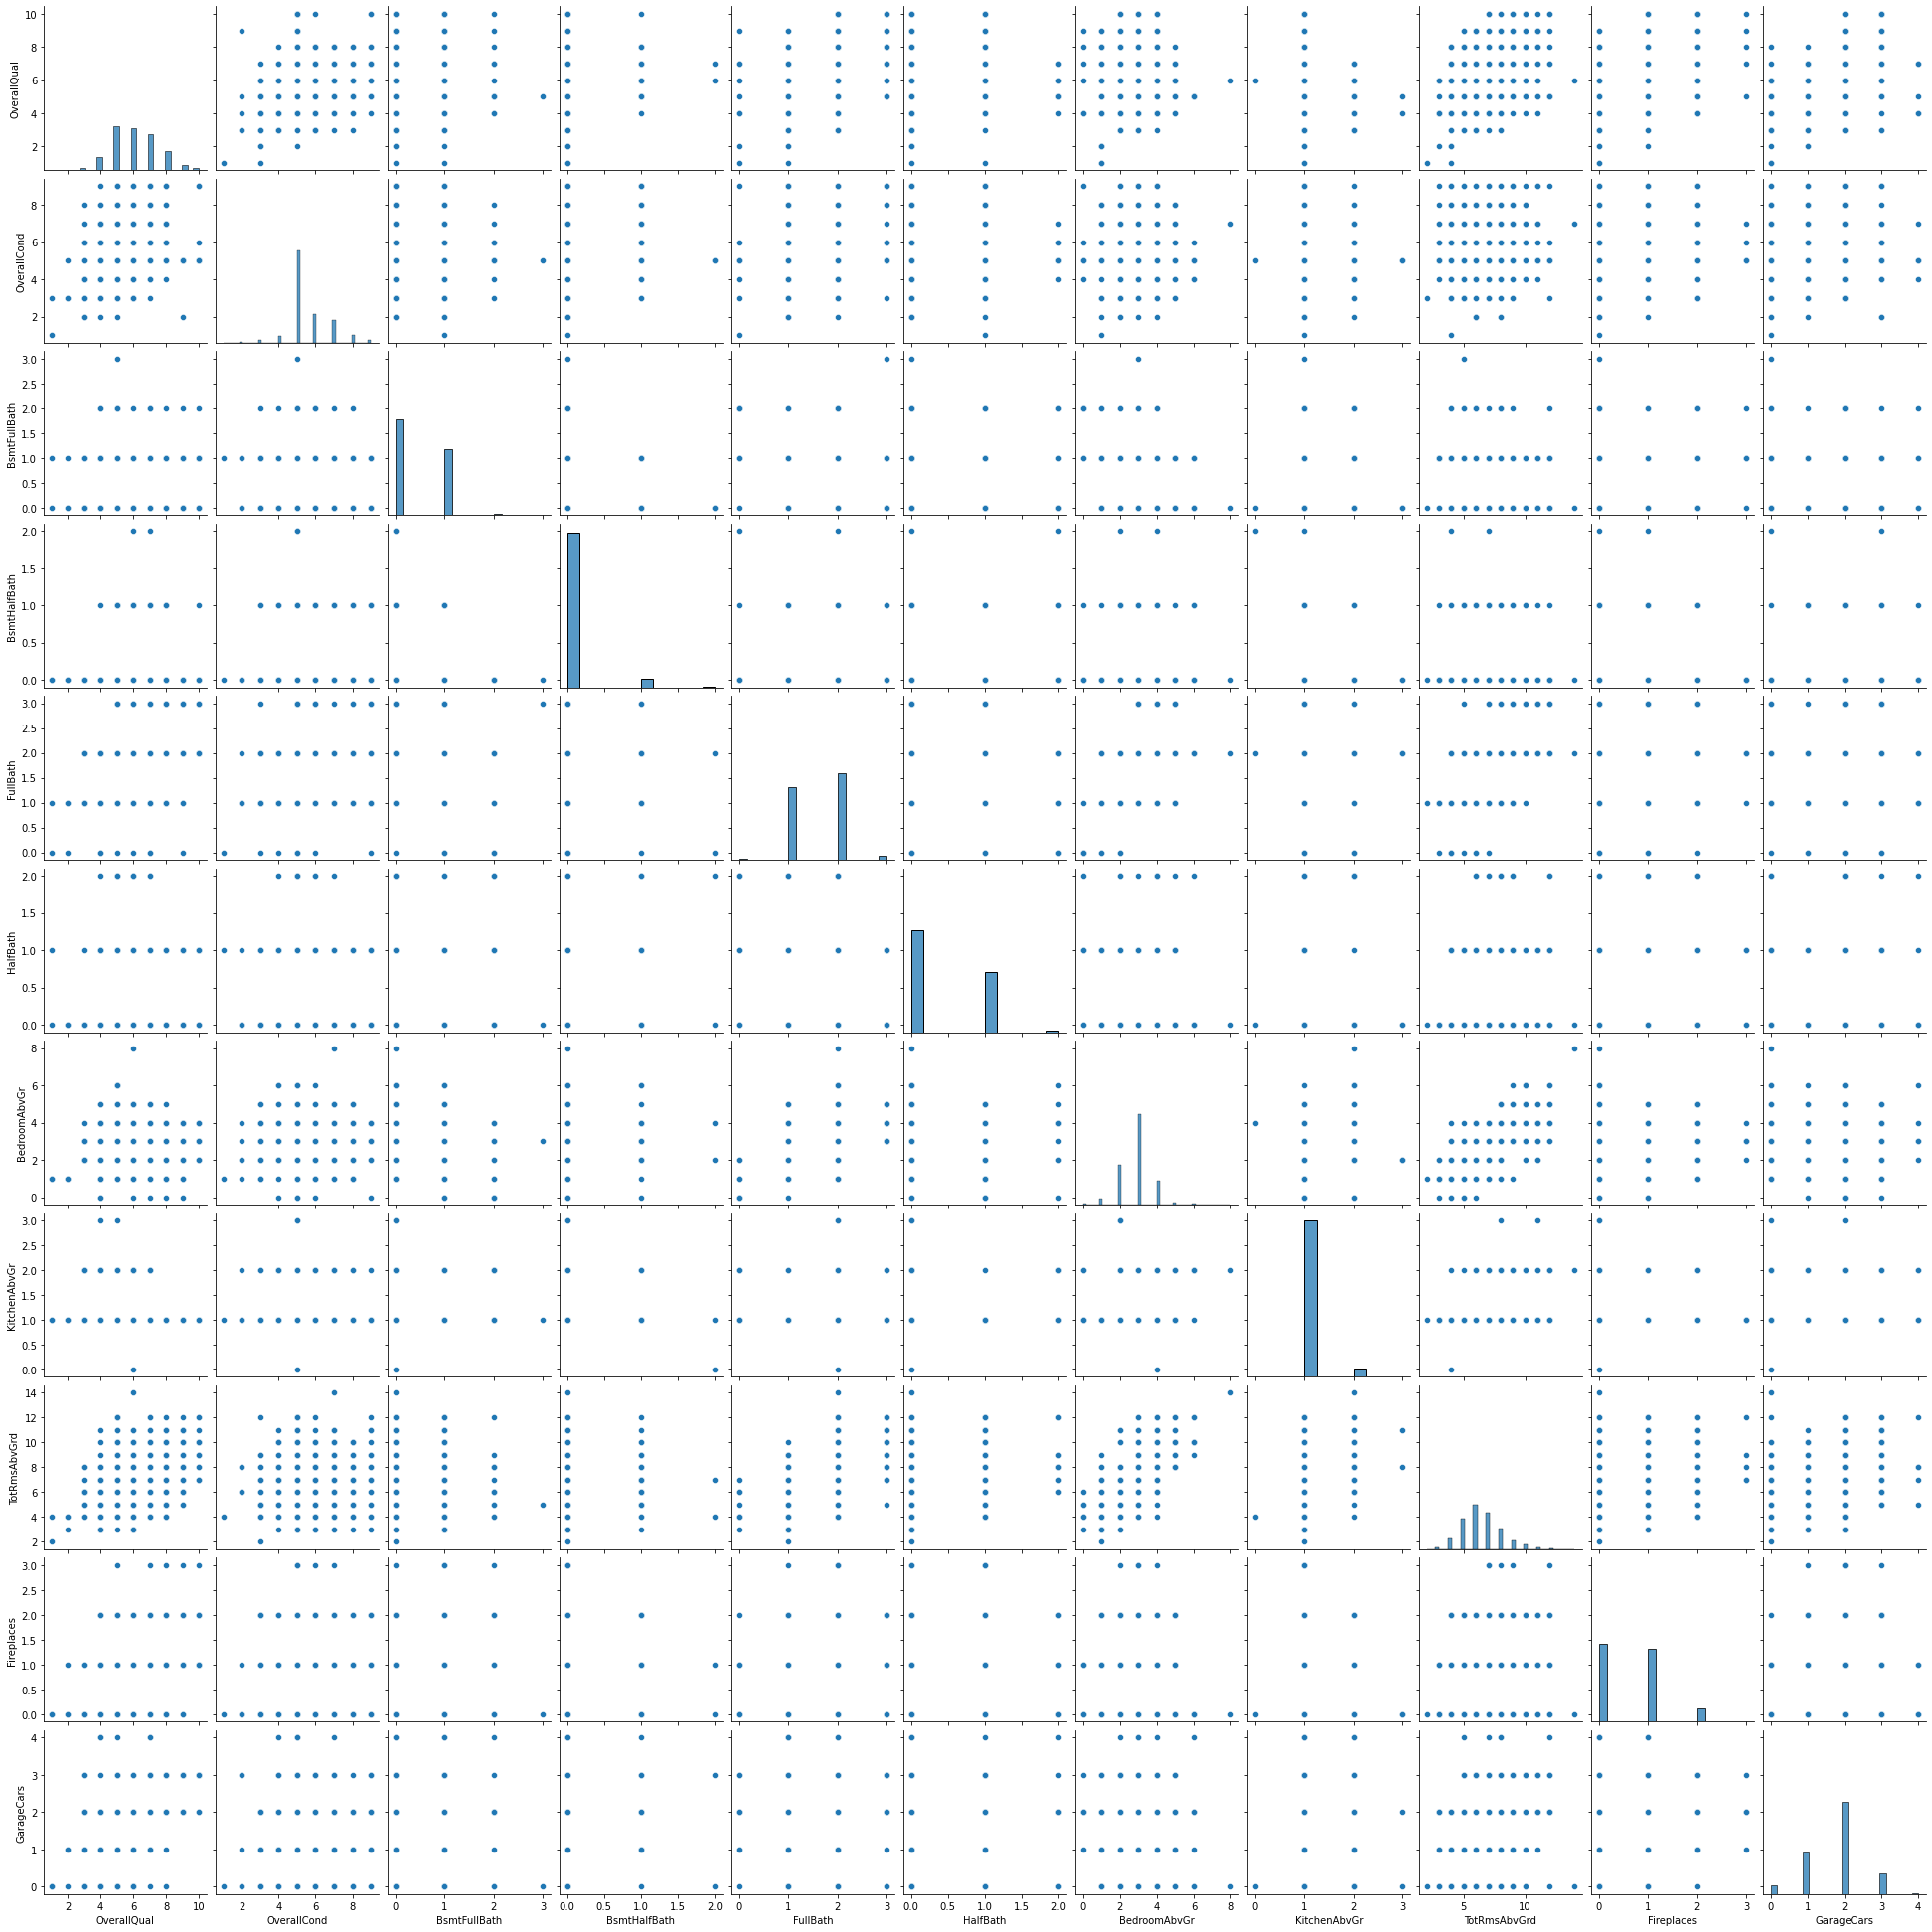

In [94]:
# Distribution with respect to numeric quality related variables
sns.pairplot(house[other_num])

## Train - Test split

In [95]:
import sklearn
from sklearn.model_selection import train_test_split

In [109]:
df_train,df_test = train_test_split(house,train_size = 0.75, shuffle=True, random_state = 100)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

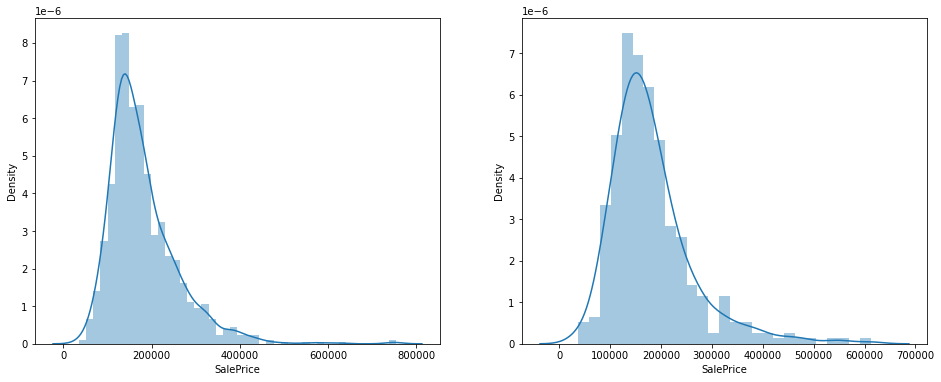

In [110]:
# Sanity check of distribution of target variable to see split is fairly balanced
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [111]:
print(df_train.SalePrice.describe(),"\n",df_test.SalePrice.describe())

count      1095.000000
mean     180635.420091
std       78652.700816
min       34900.000000
25%      129500.000000
50%      162000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64 
 count       365.000000
mean     181778.523288
std       81870.291299
min       37900.000000
25%      132500.000000
50%      165000.000000
75%      210000.000000
max      611657.000000
Name: SalePrice, dtype: float64


In [112]:
df_train.shape

(1095, 221)

In [113]:
df_test.shape

(365, 221)

In [114]:
#Saving original values of target variables.
y_train_orig = df_train.SalePrice
y_test_orig = df_test.SalePrice

In [124]:
print(y_train_orig.describe(),"\n",y_test_orig.describe())

count      1095.000000
mean     180635.420091
std       78652.700816
min       34900.000000
25%      129500.000000
50%      162000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64 
 count       365.000000
mean     181778.523288
std       81870.291299
min       37900.000000
25%      132500.000000
50%      165000.000000
75%      210000.000000
max      611657.000000
Name: SalePrice, dtype: float64


## Scaling of originally numerical variables, with no order.
#### Standard Scaler to be used so that the resultant data doesn't become too concentrated

In [116]:
df_train[to_scale].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
774        110.0    14226       375.0           0           0       1935   
92          80.0    13360         0.0         713           0        163   
360         69.0     7540         0.0         773           0        115   
549         75.0     9375         0.0           0           0        912   
546         70.0     8737         0.0         300           0        765   

     TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
774         1935      1973         0             0       1973         895   
92           876       964         0             0        964         432   
360          888       912         0             0        912         470   
549          912       912      1182             0       2094         615   
546         1065       915       720             0       1635         440   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
774         315           45              0          0            0         0   
92            0            0             44          0            0         0   
360           0            0              0          0          192         0   
549         182          182              0          0            0         0   
546           0           38              0        144            0         0   

     MiscVal  SalePrice  
774        0     395000  
92         0     163500  
360        0     156000  
549        0     263000  
546        0     210000

In [118]:
# Scaling the variables in "to_scale" with StandardScaler for both train and test datasets
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_train[to_scale] = scalar.fit_transform(df_train[to_scale])
df_test[to_scale] = scalar.transform(df_test[to_scale])

In [119]:
df_train.head()

LotFrontage   LotArea  Street  Alley  Utilities  OverallQual  \
774     1.834469  0.374287       1      0          3            8   
92      0.465680  0.287676       1      1          3            5   
360    -0.036209 -0.294393       1      0          3            6   
549     0.237548 -0.110871       1      0          3            7   
546     0.009417 -0.174679       1      0          3            6   

     OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
774            5    1.463860          4          3         4         3   
92             7   -0.564141          3          4         4         3   
360            6   -0.564141          3          3         4         3   
549            5   -0.564141          4          3         4         3   
546            7   -0.564141          3          3         4         3   

     BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
774             3             1   -0.975089             1    -0.29356   
92              1             5    0.568185             1    -0.29356   
360             3             6    0.698054             1    -0.29356   
549             1             1   -0.975089             1    -0.29356   
546             1             3   -0.325745             1    -0.29356   

     BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  \
774   3.075155     1.924341          4           1  2.039060 -0.795226   
92   -0.893279    -0.411114          5           1 -0.512031 -0.795226   
360  -1.000776    -0.384650          5           1 -0.643504 -0.795226   
549   0.784123    -0.331721          5           1 -0.643504  1.911626   
546   0.454914     0.005696          5           1 -0.635919  0.853618   

     LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
774     -0.120158   0.858221             0             0         2         0   
92      -0.120158  -1.050668             1             0         1         0   
360     -0.120158  -1.149045             1             0         1         0   
549     -0.120158   1.087137             0             0         2         1   
546     -0.120158   0.218772             0             0         1         1   

     BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
774             3             1            4             9           1   
92              2             1            3             5           0   
360             2             1            3             5           1   
549             4             1            4             8           1   
546             3             1            3             6           1   

     FireplaceQu  GarageFinish  GarageCars  GarageArea  GarageQual  \
774            4             3           3    1.999667           3   
92             0             1           2   -0.190953           3   
360            3             2           2   -0.011161           3   
549            4             3           2    0.674886           3   
546            4             1           2   -0.153102           3   

     GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
774           3           2    1.770604    -0.024215      -0.371741   
92            3           2   -0.746192    -0.709184       0.318877   
360           3           2   -0.746192    -0.709184      -0.371741   
549           3           2    0.707957     2.061133      -0.371741   
546           3           2   -0.746192    -0.130766      -0.371741   

     3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence   MiscVal  SalePrice  \
774  -0.120776    -0.270551 -0.060152       0      0 -0.083079   2.726703   
92   -0.120776    -0.270551 -0.060152       0      0 -0.083079  -0.217961   
360  -0.120776     3.560822 -0.060152       0      3 -0.083079  -0.313361   
549  -0.120776    -0.270551 -0.060152       0      0 -0.083079   1.047672   
546   4.449408    -0.270551 -0.060152       0      0 -0.083079   0.373515   

     Age  Time_Remod  Ga

In [120]:
df_test.head()

LotFrontage   LotArea  Street  Alley  Utilities  OverallQual  \
1436    -0.446846 -0.148376       1      0          3            4   
57       0.876317  0.116156       1      0          3            7   
780     -0.309967 -0.260889       1      0          3            7   
382      0.420054 -0.123873       1      0          3            7   
1170     0.283175 -0.060365       1      0          3            6   

      OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
1436            6   -0.564141          3          3         3         3   
57              5   -0.564141          4          3         4         3   
780             5   -0.358637          3          3         4         4   
382             5   -0.564141          4          3         4         3   
1170            6   -0.564141          3          3         3         3   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
1436             1             5    0.358230             1    -0.29356   
57               1             1   -0.975089             1    -0.29356   
780              1             1   -0.975089             1    -0.29356   
382              3             1   -0.975089             1    -0.29356   
1170             3             5    0.154769             1    -0.29356   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  \
1436  -0.702920    -0.437578          3           1 -0.764864 -0.795226   
57     0.667668    -0.446399          5           1 -0.774978  1.174226   
780    1.511968     0.385014          4           1  0.218658 -0.795226   
382    0.844591    -0.272177          5           1 -0.575239  1.169646   
1170   0.027165     0.074061          3           1 -0.122667 -0.795226   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1436     -0.120158  -1.239854             0             0         1         0   
57       -0.120158   0.379580             0             0         2         1   
780      -0.120158  -0.503920             0             0         2         0   
382      -0.120158   0.525254             0             0         2         1   
1170     -0.120158  -0.759321             1             0         1         0   

      BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
1436             3             1            3             5           0   
57               3             1            4             7           0   
780              3             1            3             6           1   
382              3             1            4             8           0   
1170             3             1            3             6           1   

      FireplaceQu  GarageFinish  GarageCars  GarageArea  GarageQual  \
1436            0             1           2    0.263258           3   
57              0             2           2    0.438318           3   
780             3             3           2   -0.332893           3   
382             0             2           2    0.788439           3   
1170            1             3           1   -0.541073           3   

      GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
1436           3           2   -0.746192    -0.709184      -0.371741   
57             3           2   -0.746192     0.356323      -0.371741   
780            3           2    1.011571    -0.389532      -0.371741   
382            3           2    0.404344     0.097557      -0.371741   
1170           3           2    0.875744    -0.709184      -0.371741   

      3SsnPorch  ScreenPorch   PoolArea  PoolQC  Fence   MiscVal  SalePrice  \
1436  -0.120776    -0.270551  -0.060152       0      2 -0.083079  -0.764918   
57    -0.120776    -0.270551  -0.060152       0      0 -0.083079   0.201796   
780   -0.120776    -0.270551  -0.060152       0      0 -0.083079  -0.058962   
382   -0.120776    -0.270551  -0.060152       0      0 -0.083079   0.418035   
1170  -0.120776    -0.270551  17.224066      

In [121]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 774 to 792
Columns: 221 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(20), int64(34), uint8(167)
memory usage: 649.1 KB


In [122]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1436 to 552
Columns: 221 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(20), int64(34), uint8(167)
memory usage: 216.4 KB


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

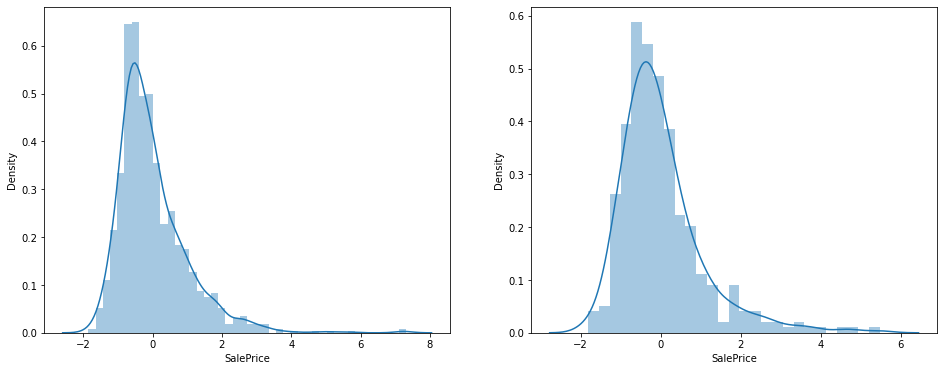

In [123]:
# Sanity check of target variable once again
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [125]:
# Segregating data for target and independent variables for both train and test datasets
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [126]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(1095, 220) (365, 220) (1095,) (365,)


In [127]:
# Importing relevant libraries to be used
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE

## Lasso Regression

#### Since Lasso Regression performs an inherent feature selection, we start off with this to see how it performs.

In [128]:
# An initial run with regularization parameter lambda (alpha in sklearn) = 0.001 to see how it works
las = Lasso(alpha=0.001)
las.fit(X_train,y_train)

y_train_pred = las.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = las.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8912259277218869
0.8615085687727917


### Hyperparameter tuning for value of Regularization parameter lambda (alpha in sklearn parlance)

In [129]:
# creating a KFold object with 10 splits
las_folds = KFold(n_splits=10,shuffle=True,random_state=100)

# Defining hyperparameter values to be used for tuning 
hyper_param = {'alpha':[0.0001,0.0003,0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}

# Initating a Lasso Regression object
las1 = Lasso()

# Performing Grid Search cross-validation to find optimal value of alpha
las_cv = GridSearchCV(estimator = las1,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=las_folds,
                        verbose=1,
                        return_train_score=True
                       )

las_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03,
                                   0.1, 0.3, 1.0, 3.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [130]:
# cv results
las_res = pd.DataFrame(las_cv.cv_results_)
las_res

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.136152      0.050042         0.004021        0.000672      0.0001   
1       0.096827      0.038910         0.003374        0.000728      0.0003   
2       0.084632      0.010887         0.002984        0.000019       0.001   
3       0.028263      0.002264         0.002976        0.000020       0.003   
4       0.011829      0.000511         0.002972        0.000067        0.01   
5       0.008867      0.000729         0.003071        0.000251        0.03   
6       0.007402      0.000289         0.003103        0.000324         0.1   
7       0.007175      0.000083         0.002975        0.000029         0.3   
8       0.006662      0.000122         0.002994        0.000052         1.0   
9       0.007912      0.001344         0.003515        0.000737         3.0   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.330727           0.881376           0.887507   
1  {'alpha': 0.0003}           0.717113           0.898683           0.875564   
2   {'alpha': 0.001}           0.893491           0.899574           0.853896   
3   {'alpha': 0.003}           0.892848           0.913116           0.842635   
4    {'alpha': 0.01}           0.868574           0.904331           0.825338   
5    {'alpha': 0.03}           0.834756           0.876657           0.787113   
6     {'alpha': 0.1}           0.792235           0.844071           0.720538   
7     {'alpha': 0.3}           0.657820           0.696088           0.532305   
8     {'alpha': 1.0}           0.379588           0.392197           0.313293   
9     {'alpha': 3.0}           0.350959           0.372030           0.285081   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.891625          -7.241550           0.671020           0.866638   
1           0.891091          -9.238929           0.713410           0.874874   
2           0.892478          -0.627032           0.747180           0.867947   
3           0.894891           0.421710           0.742215           0.862589   
4           0.868405           0.386591           0.720315           0.839733   
5           0.850076           0.509838           0.708150           0.815642   
6           0.834538           0.679740           0.694579           0.761891   
7           0.707489           0.503021           0.626460           0.633539   
8           0.389735           0.268570           0.388236           0.363548   
9           0.371509           0.264816           0.356590           0.338550   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0          -0.129621          -0.213702           0.729914        -0.232606   
1           0.528511          -0.182573           0.814944        -0.310731   
2           0.861670          -0.121277           0.844007         0.611194   
3           0.861383          -0.030815           0.868043         0.726861   
4           0.836037           0.007794           0.866581         0.712370   
5           0.817562           0.169360           0.838106         0.720726   
6           0.778170           0.425886           0.809738         0.734139   
7           0.651584           0.585067           0.679402         0.627278   
8           0.382760           0.308091           0.386320         0.357234   
9           0.388417           0.298918           0.365876         0.339275   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        2.369903                9            0.931938            0.933273   
1        2.992089               10            0.921191            0.919017   
2        0.507144                6            0.890834            0.890610   
3        0.287708                2            0.864763            0.864332   
4        0.275005                4            0.825995            0.823100   
5        0.

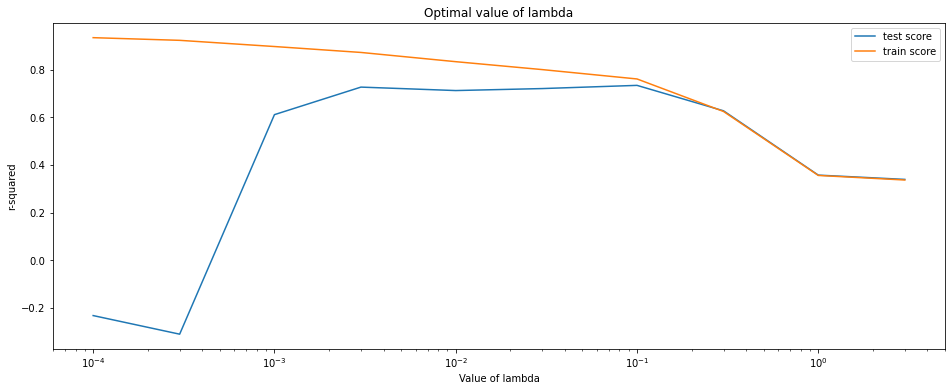

In [131]:
# plotting Lasso cv results
plt.figure(figsize=(16,6))

plt.plot(las_res["param_alpha"], las_res["mean_test_score"])
plt.plot(las_res["param_alpha"], las_res["mean_train_score"])
plt.xlabel('Value of lambda')
plt.ylabel('r-squared')
plt.xscale("log")
plt.title("Optimal value of lambda")
plt.legend(['test score', 'train score'], loc='upper right')

#### We can see from the plot above that for values ranging from 0.003 to 0.1, the test score is fairly stable, while the training score decreases slightly. Lambda values below and above this range perform poorly.
#### We know that as the value of lambda increases, the model becomes simpler and may underfit. So, while our objective is to prevent overfitting with a suitable regularization parameter, it should not underfit either.

#### Hence, we move forward with a lambda (or alpha) value of 0.003 for our Lasso model

In [133]:
las2 = Lasso(alpha=0.003)
las2.fit(X_train,y_train)

y_train_pred2 = las2.predict(X_train)
print("Train r2_score: ", r2_score(y_true=y_train,y_pred=y_train_pred2))

y_test_pred2  = las2.predict(X_test)
print("Test r2_score: ",r2_score(y_true=y_test,y_pred=y_test_pred2))

Train r2_score:  0.8655726007116615
Test r2_score:  0.8676020530972222


#### The r2 scores above show that the model performs well with unseen test data as well and since the scores are fairly similar, we can conclude that overfitting and thereby variance in the model has been adequately minimized, while also not allowing the bias to be very high.

### Consolidating Lasso regression model and coefficients

In [134]:
lasso_results = pd.DataFrame(list(zip(X_train.columns,las2.coef_)))
lasso_results.columns = ["Feature","Coefficient"]
lasso_results[abs(lasso_results.Coefficient) > 0].count()

Feature        74
Coefficient    74
dtype: int64

In [140]:
# Top 10 variables as per Lasso Regression positively affecting target variable
lasso_results[abs(lasso_results.Coefficient) > 0].sort_values(by = "Coefficient",ascending = False).head(10)

Feature  Coefficient
97   Neighborhood_NoRidge     0.456796
98   Neighborhood_NridgHt     0.411095
24              GrLivArea     0.334825
144      RoofMatl_WdShngl     0.252054
127     HouseStyle_1Story     0.221769
88   Neighborhood_Crawfor     0.190703
103  Neighborhood_Somerst     0.156952
104  Neighborhood_StoneBr     0.155779
5             OverallQual     0.140782
108       Condition1_Norm     0.138599

### Checking effect of doubling the value of lambda on Lasso Regression

In [141]:
las3 = Lasso(alpha=0.006)
las3.fit(X_train,y_train)

y_train_pred3 = las3.predict(X_train)
print("Train r2_score: ",r2_score(y_true=y_train,y_pred=y_train_pred3))

y_test_pred3  = las3.predict(X_test)
print("Test r2_score: ",r2_score(y_true=y_test,y_pred=y_test_pred3))

Train r2_score:  0.8447650618670419
Test r2_score:  0.8533057112487656


In [142]:
lasso_results2 = pd.DataFrame(list(zip(X_train.columns,las3.coef_)))
lasso_results2.columns = ["Feature","Coefficient"]
lasso_results2[abs(lasso_results2.Coefficient)  > 0].count()

Feature        52
Coefficient    52
dtype: int64

In [143]:
lasso_results2[abs(lasso_results2.Coefficient) > 0].sort_values(by = "Coefficient",ascending = False).head(10)

Feature  Coefficient
97   Neighborhood_NoRidge     0.349240
24              GrLivArea     0.331641
98   Neighborhood_NridgHt     0.255850
5             OverallQual     0.160976
127     HouseStyle_1Story     0.160327
108       Condition1_Norm     0.115176
31            KitchenQual     0.114427
36             GarageCars     0.105865
212          SaleType_New     0.105657
175       MasVnrType_None     0.084042

#### By doubling the lambda value to 0.006, we see some interesting changes:
- There is a very slight decrease in the r2_score 
- The number of relevant features identified by Lasso drops from 74 to 52.
- There is some shuffling of the top features affecting SalePrice.

## Ridge Regression

In [145]:
# Using lambda value chosen for lasso to check the performance of ridge regression
ridge = Ridge(alpha=0.003)
ridge.fit(X_train,y_train)

y_trainr_pred = ridge.predict(X_train)
print("Train r2_score: ",r2_score(y_true=y_train,y_pred=y_trainr_pred))

y_testr_pred  = ridge.predict(X_test)
print("Test r2_score: ",r2_score(y_true=y_test,y_pred=y_testr_pred))

Train r2_score:  0.9341806695971658
Test r2_score:  0.8075242219516848


#### There is clear overfitting with a lambda value of 0.003 and it is likely that we need to use a higher value for Ridge regression.

### Hyperparameter tuning for value of Regularization parameter lambda (alpha in sklearn parlance)

In [146]:
# creating a KFold object with 10 splits
ridge_folds = KFold(n_splits=11,shuffle=True,random_state=100)

# Defining hyperparameter values to be used for tuning 
hyper_param = {'alpha':[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0, 100]}

# Initating a Ridge Regression object
ridge1 = Ridge()

# Performing Grid Search cross-validation to find optimal value of alpha
ridge_cv = GridSearchCV(estimator = ridge1,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=ridge_folds,
                        verbose=1,
                        return_train_score=True
                       )

ridge_cv.fit(X_train,y_train)

Fitting 11 folds for each of 11 candidates, totalling 121 fits


GridSearchCV(cv=KFold(n_splits=11, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0,
                                   10.0, 30.0, 100]},
             return_train_score=True, scoring='r2', verbose=1)

In [147]:
# cv results
ridge_res = pd.DataFrame(ridge_cv.cv_results_)
ridge_res

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.010009      0.000789         0.004940        0.000318       0.001   
1        0.007945      0.001594         0.003708        0.000833       0.003   
2        0.006393      0.000047         0.002973        0.000036        0.01   
3        0.006457      0.000110         0.002967        0.000032        0.03   
4        0.006393      0.000049         0.002985        0.000068         0.1   
5        0.006380      0.000028         0.002948        0.000025         0.3   
6        0.006571      0.000476         0.003088        0.000225         1.0   
7        0.007324      0.001223         0.003764        0.001122         3.0   
8        0.007506      0.001232         0.003718        0.000687        10.0   
9        0.008034      0.001542         0.003419        0.000422        30.0   
10       0.007929      0.000403         0.004829        0.000726         100   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 0.001}          -0.007089           0.759129           0.885507   
1   {'alpha': 0.003}           0.062281           0.777495           0.885023   
2    {'alpha': 0.01}           0.253207           0.812226           0.883182   
3    {'alpha': 0.03}           0.548691           0.843136           0.878097   
4     {'alpha': 0.1}           0.810442           0.859479           0.866993   
5     {'alpha': 0.3}           0.883263           0.864617           0.855144   
6     {'alpha': 1.0}           0.892267           0.872005           0.843968   
7     {'alpha': 3.0}           0.892335           0.884381           0.837219   
8    {'alpha': 10.0}           0.892182           0.900393           0.834188   
9    {'alpha': 30.0}           0.890157           0.911131           0.830478   
10    {'alpha': 100}           0.883169           0.914010           0.818315   

    split3_test_score  split4_test_score  split5_test_score  \
0            0.907820           0.875948          -7.941209   
1            0.907808           0.877120          -7.676853   
2            0.906996           0.878389          -6.857758   
3            0.902528           0.875194          -5.172982   
4            0.891113           0.869664          -2.537022   
5            0.882479           0.873814          -0.721195   
6            0.882881           0.882992           0.138604   
7            0.891012           0.886969           0.398884   
8            0.901332           0.886669           0.494678   
9            0.904893           0.884095           0.524838   
10           0.899269           0.877298           0.560913   

    split6_test_score  split7_test_score  split8_test_score  \
0            0.514687           0.837589          -0.345398   
1            0.522439           0.839463          -0.344243   
2            0.544637           0.844437          -0.341004   
3            0.583426           0.850921          -0.333726   
4            0.630877           0.854949          -0.310324   
5            0.656746           0.860513          -0.255061   
6            0.670586           0.875982          -0.160623   
7            0.677458           0.891211          -0.085672   
8            0.679074           0.898029          -0.043438   
9            0.678361           0.891176          -0.029920   
10           0.682302           0.874250           0.011088   

    split9_test_score  split10_test_score  mean_test_score  std_test_score  \
0            0.862621            0.644894        -0.182318        2.484402   
1            0.863351            0.657343        -0.148070        2.411179   
2            0.864520            0.690082        -0.047372        2.183654   
3            0.863461            0.735951         0.143154        1.715195   
4            0.857510            0.771596         0.415025        0.990652   
5            0.854643            0.786907         0.594716        0.523743   
6         

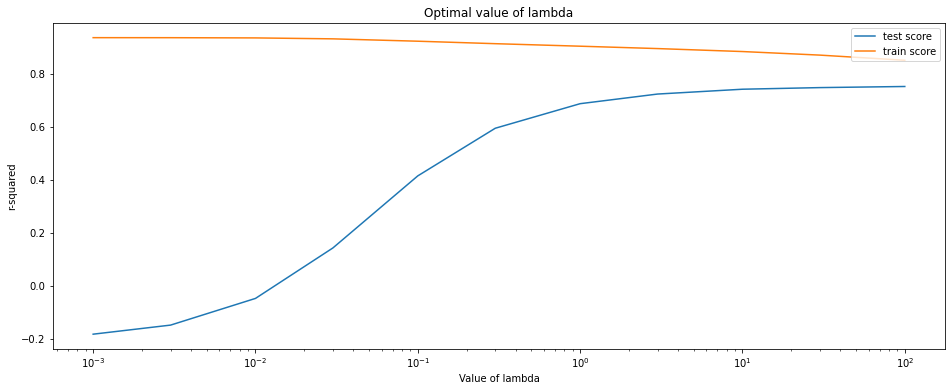

In [148]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(ridge_res["param_alpha"], ridge_res["mean_test_score"])
plt.plot(ridge_res["param_alpha"], ridge_res["mean_train_score"])
plt.xlabel('Value of lambda')
plt.ylabel('r-squared')
plt.xscale("log")
plt.title("Optimal value of lambda")
plt.legend(['test score', 'train score'], loc='upper right')

#### Once again we see that the regression performs well for lambda values around 10 or above. Choosing lambda = 30.0 initially to see the results

In [154]:
ridge2 = Ridge(alpha=30.0)
ridge2.fit(X_train,y_train)

y_trainr_pred2 = ridge2.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_trainr_pred2))

0.8674789597821512


In [155]:
ridge_results = pd.DataFrame(list(zip(X_train.columns,ridge2.coef_)))
ridge_results.columns = ["Feature","Coefficient"]
ridge_results.shape

(220, 2)

In [156]:
ridge_results.sort_values(by = "Coefficient",ascending = False).head(10)

Feature  Coefficient
97   Neighborhood_NoRidge     0.225381
98   Neighborhood_NridgHt     0.219404
24              GrLivArea     0.183692
127     HouseStyle_1Story     0.167218
5             OverallQual     0.143101
22               2ndFlrSF     0.141812
144      RoofMatl_WdShngl     0.131931
108       Condition1_Norm     0.125241
88   Neighborhood_Crawfor     0.118470
36             GarageCars     0.116190

#### From the r2_score above, a value of lambda = 30.0 performs very well with both training data. 
#### However, it must be taken into account that ridge regression does not perform any kind of feature selection and hence, there is always the possibility of overfitting if all the variables are included. 
#### Some feature elimination will be necessary to ensure we are including only the relevant features. 
(We can use the fact that Lasso Regression suggested about 74 as optimal number of features.)

## RFE for Ridge Regression - Using Grid Search cross-validation

In [157]:
# creating a KFold object with 9 splits 
folds = KFold(n_splits = 9, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(30,200,20))}]

# specify model - Choosing a value of lambda = 30.0 from the earlier section
lm = Ridge(alpha=30.0)
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
rfe_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
rfe_cv.fit(X_train, y_train) 

Fitting 9 folds for each of 9 candidates, totalling 81 fits


GridSearchCV(cv=KFold(n_splits=9, random_state=100, shuffle=True),
             estimator=RFE(estimator=Ridge(alpha=30.0)),
             param_grid=[{'n_features_to_select': [30, 50, 70, 90, 110, 130,
                                                   150, 170, 190]}],
             return_train_score=True, scoring='r2', verbose=1)

In [158]:
# cv results
rfe_res = pd.DataFrame(rfe_cv.cv_results_)
#rfe_res

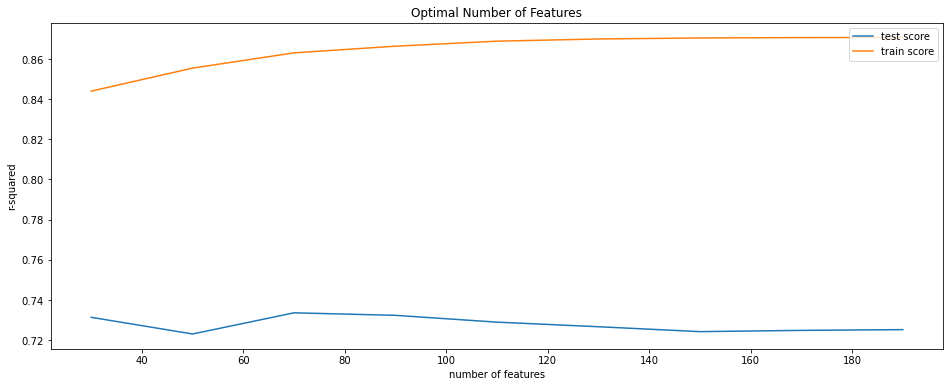

In [159]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(rfe_res["param_n_features_to_select"], rfe_res["mean_test_score"])
plt.plot(rfe_res["param_n_features_to_select"], rfe_res["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.yscale("log")
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [160]:
rfe_cv.best_params_

{'n_features_to_select': 70}

#### The above analysis suggests that just like Lasso Regression, the number of features that should be included in the Ridge Regression model is in the ballpark of 70 features.
#### We keep a buffer of 10 features and try to identify the top 80 features below

In [161]:
ridge= Ridge()
ridge.fit(X_train,y_train)
rfe_ridge = RFE(ridge,80)
rfe_ridge.fit(X_train,y_train)

RFE(estimator=Ridge(), n_features_to_select=80)

In [162]:
# Identifying the top 80 variables for Ridge using RFE
rfe_cols = pd.DataFrame(list(zip(X_train.columns,rfe_ridge.support_,rfe_ridge.ranking_)))
rfe_cols.columns = ['Variable_name','Status','Rank']
rfe_cols_sel = list(rfe_cols[rfe_cols.Status == True].Variable_name)
rfe_cols_sel

['Utilities',
 'OverallQual',
 'ExterQual',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'GarageCars',
 'GarageQual',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR3',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_RRAn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_Twnhs',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'RoofMatl_C

In [163]:
# Columns to be rejected
rfe_cols_rej = list(rfe_cols[rfe_cols.Status == False].Variable_name)
rfe_cols_rej

['LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'OverallCond',
 'MasVnrArea',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 'LowQualFinSF',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageArea',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'Age',
 'Time_Remod',
 'Garage_Age',
 'MSSubClass_30',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_180',
 'MSSubClass_190',
 'LotShape_IR2',
 'LotShape_Reg',
 'LotConfig_FR2',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'Neighborhood_Blueste',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Gilbert',
 'Neighbo

In [164]:
# Creating new independent variable datasets for Ridge regression after Recursive Feature Elimination
X_train_ridge = X_train[rfe_cols_sel]
X_test_ridge = X_test[rfe_cols_sel]

## Ridge Regression revisited

#### We try to identify the appropriate lambda value using the top 80 variables identified by RFE.

In [165]:
ridge_folds2 = KFold(n_splits=9,shuffle=True,random_state=13)

hyper_param = {'alpha':[0.1, 0.3, 1.0, 3.0, 7.0, 10.0, 30.0, 70.0, 100.0]}

ridge3 = Ridge()

ridge_cv2 = GridSearchCV(estimator = ridge3,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=ridge_folds2,
                        verbose=1,
                        return_train_score=True
                       )

ridge_cv2.fit(X_train_ridge,y_train)

Fitting 9 folds for each of 9 candidates, totalling 81 fits


GridSearchCV(cv=KFold(n_splits=9, random_state=13, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.3, 1.0, 3.0, 7.0, 10.0, 30.0, 70.0,
                                   100.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [166]:
# Ridge cv results
ridge_res2 = pd.DataFrame(ridge_cv2.cv_results_)
ridge_res2

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006786      0.000610         0.004196        0.000706         0.1   
1       0.004267      0.000610         0.002634        0.000436         0.3   
2       0.003748      0.000205         0.002271        0.000259         1.0   
3       0.005302      0.000057         0.003217        0.000042         3.0   
4       0.005236      0.000045         0.003221        0.000037         7.0   
5       0.004201      0.000760         0.002478        0.000395        10.0   
6       0.003774      0.000225         0.002319        0.000315        30.0   
7       0.003645      0.000022         0.002173        0.000026        70.0   
8       0.003665      0.000038         0.002160        0.000022       100.0   

             params  split0_test_score  split1_test_score  split2_test_score  \
0    {'alpha': 0.1}           0.849395           0.872604           0.866608   
1    {'alpha': 0.3}           0.853381           0.871073           0.864528   
2    {'alpha': 1.0}           0.856873           0.868626           0.863610   
3    {'alpha': 3.0}           0.860622           0.864647           0.866067   
4    {'alpha': 7.0}           0.863353           0.858654           0.867940   
5   {'alpha': 10.0}           0.863769           0.855045           0.867617   
6   {'alpha': 30.0}           0.859285           0.840005           0.859437   
7   {'alpha': 70.0}           0.849092           0.825677           0.845994   
8  {'alpha': 100.0}           0.843288           0.819272           0.838873   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.828224           0.787629           0.661935           0.854712   
1           0.819893           0.819451           0.729706           0.852757   
2           0.813227           0.822955           0.761270           0.851988   
3           0.809796           0.819094           0.776306           0.852062   
4           0.808203           0.815379           0.783726           0.849817   
5           0.807468           0.813485           0.785557           0.847858   
6           0.803235           0.805518           0.785449           0.837893   
7           0.796434           0.796618           0.780050           0.826507   
8           0.792319           0.791956           0.777096           0.820784   

   split7_test_score  split8_test_score  mean_test_score  std_test_score  \
0           0.543273           0.897502         0.795765        0.110758   
1           0.553099           0.896685         0.806730        0.100257   
2           0.568607           0.898638         0.811755        0.093644   
3           0.577896           0.901595         0.814232        0.090542   
4           0.576990           0.902344         0.814045        0.090402   
5           0.574673           0.901611         0.813009        0.090663   
6           0.565159           0.893912         0.805544        0.090695   
7           0.563212           0.882763         0.796261        0.087624   
8           0.566115           0.877095         0.791867        0.084910   

   rank_test_score  split0_train_score  split1_train_score  \
0                8            0.890346            0.889846   
1                5            0.882605            0.882150   
2                4            0.873659            0.873282   
3                1            0.864360            0.864179   
4                2            0.855126            0.855505   
5                3            0.850405            0.851183   
6                6            0.832625            0.834992   
7                7            0.816715            0.820134   
8                9            0.809807            0.813536   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.890079            0.891906            0.894400   
1            0.882402            0.884877            0.886861   
2            0.873617  

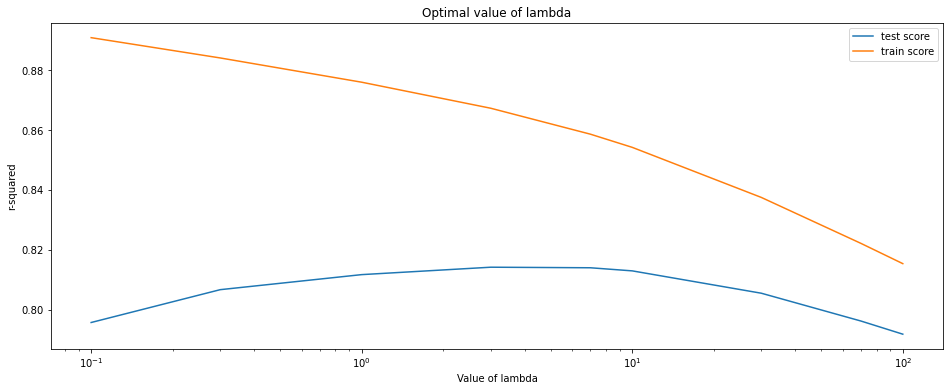

In [167]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(ridge_res2["param_alpha"], ridge_res2["mean_test_score"])
plt.plot(ridge_res2["param_alpha"], ridge_res2["mean_train_score"])
plt.xlabel('Value of lambda')
plt.ylabel('r-squared')
plt.xscale("log")
plt.title("Optimal value of lambda")
plt.legend(['test score', 'train score'], loc='upper right')

In [168]:
ridge_cv2.best_params_

{'alpha': 3.0}

In [173]:
ridge4 = Ridge(alpha=3.0)
ridge4.fit(X_train_ridge,y_train)

y_trainr_pred4 = ridge4.predict(X_train_ridge)
print(r2_score(y_true=y_train,y_pred=y_trainr_pred4))

y_testr_pred4  = ridge4.predict(X_test_ridge)
print(r2_score(y_true=y_test,y_pred=y_testr_pred4))

0.8656669700083203
0.8503006524708696


### Consolidating Ridge regression model and coefficients

In [174]:
ridge_results2 = pd.DataFrame(list(zip(X_train_ridge.columns,ridge4.coef_)))
ridge_results2.columns = ["Feature","Coefficient"]
ridge_results2.shape

(80, 2)

In [175]:
ridge_results2.sort_values(by = "Coefficient",ascending = False).head(10)

Feature  Coefficient
57      RoofMatl_WdShngl     0.739055
32  Neighborhood_NridgHt     0.575085
31  Neighborhood_NoRidge     0.490822
71         GarageType_NA     0.354964
34  Neighborhood_StoneBr     0.349343
22       LandContour_Low     0.337254
21       LandContour_HLS     0.309143
28  Neighborhood_Crawfor     0.294715
33  Neighborhood_Somerst     0.259273
4               2ndFlrSF     0.259095

### Checking effect of doubling the value of lambda on Ridge Regression

In [177]:
ridge5 = Ridge(alpha=6.0)
ridge5.fit(X_train_ridge,y_train)

y_trainr_pred5 = ridge5.predict(X_train_ridge)
print("Train r2_score: ",r2_score(y_true=y_train,y_pred=y_trainr_pred5))

y_testr_pred5  = ridge5.predict(X_test_ridge)
print("Test r2_score: ",r2_score(y_true=y_test,y_pred=y_testr_pred5))

Train r2_score:  0.8592151127253849
Test r2_score:  0.850890941679679


In [178]:
ridge_results3 = pd.DataFrame(list(zip(X_train_ridge.columns,ridge5.coef_)))
ridge_results3.columns = ["Feature","Coefficient"]
ridge_results3.shape

(80, 2)

In [179]:
ridge_results3.sort_values(by = "Coefficient",ascending = False).head(10)

Feature  Coefficient
32  Neighborhood_NridgHt     0.515541
57      RoofMatl_WdShngl     0.492975
31  Neighborhood_NoRidge     0.455145
22       LandContour_Low     0.287853
34  Neighborhood_StoneBr     0.272434
71         GarageType_NA     0.264624
21       LandContour_HLS     0.263144
28  Neighborhood_Crawfor     0.258982
4               2ndFlrSF     0.230102
6           BsmtFullBath     0.215528

#### By doubling the lambda value to 6.0, we see some interesting changes:
- There is a very slight decrease in the r2_score again, same as Lasso, but very comparable. 
- There is some shuffling of the top features affecting SalePrice as well.

## Model Evaluation - Lasso regression

In [235]:
# Creating a dataframe of original and predicted target variable
Test_tgt = pd.DataFrame({"SalePrice":y_test_orig,"Scaled_SP":y_test,"Lasso_Predicted_SP(scaled)":y_test_pred2})
Test_tgt.head()

SalePrice  Scaled_SP  Lasso_Predicted_SP(scaled)
1436     120500  -0.764918                   -0.931526
57       196500   0.201796                    0.153212
780      176000  -0.058962                   -0.235917
382      213500   0.418035                    0.425714
1170     171000  -0.122562                   -0.516900

### Calculate mean and standard deviation of the original training data SalePrice to obtain unscaled predicted values.

In [236]:
mean = y_train_orig.mean()

In [237]:
sd = y_train_orig.std()

In [238]:
print("Training data Sale Price mean: ", mean)
print("Training data Sale Price standard deviation: ",sd)

Training data Sale Price mean:  180635.4200913242
Training data Sale Price standard deviation:  78652.70081604845


In [240]:
# Updating dataframe with unscaled value of predicted Sale Price
Test_tgt["Lasso_Predicted_SalePrice"] = Test_tgt["Lasso_Predicted_SP(scaled)"]*sd + mean
Test_tgt.head()

SalePrice  Scaled_SP  Lasso_Predicted_SP(scaled)  \
1436     120500  -0.764918                   -0.931526   
57       196500   0.201796                    0.153212   
780      176000  -0.058962                   -0.235917   
382      213500   0.418035                    0.425714   
1170     171000  -0.122562                   -0.516900   

      Lasso_Predicted_SalePrice  
1436              107368.416154  
57                192685.930052  
780               162079.916562  
382               214118.959734  
1170              139979.807530

In [241]:
# Calculating r2 score again as a sanity check
print("Lasso r2_score for test data: ",round(r2_score(y_true=Test_tgt.SalePrice,y_pred=Test_tgt["Lasso_Predicted_SalePrice"]),4))

Lasso r2_score for test data:  0.8677


#### This corresponds with the r2_score we had seen earlier on

In [243]:
# Evaluating residuals
Test_tgt["Lasso_res"] = Test_tgt["SalePrice"] - Test_tgt["Lasso_Predicted_SalePrice"]
Test_tgt.head()

SalePrice  Scaled_SP  Lasso_Predicted_SP(scaled)  \
1436     120500  -0.764918                   -0.931526   
57       196500   0.201796                    0.153212   
780      176000  -0.058962                   -0.235917   
382      213500   0.418035                    0.425714   
1170     171000  -0.122562                   -0.516900   

      Lasso_Predicted_SalePrice     Lasso_res  
1436              107368.416154  13131.583846  
57                192685.930052   3814.069948  
780               162079.916562  13920.083438  
382               214118.959734   -618.959734  
1170              139979.807530  31020.192470

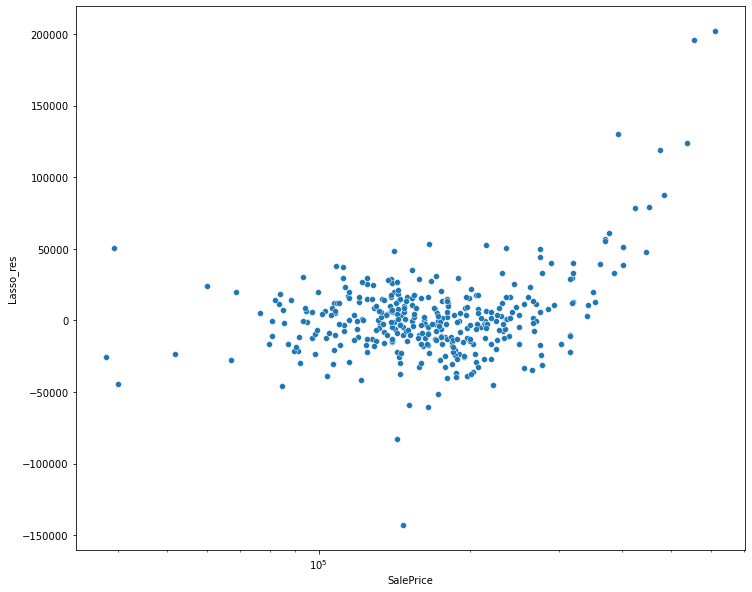

In [244]:
plt.figure(figsize = (12,10))
sns.scatterplot(x=Test_tgt.SalePrice,y=Test_tgt.Lasso_res)
plt.xscale("log")

<AxesSubplot:xlabel='Lasso_res', ylabel='Density'>

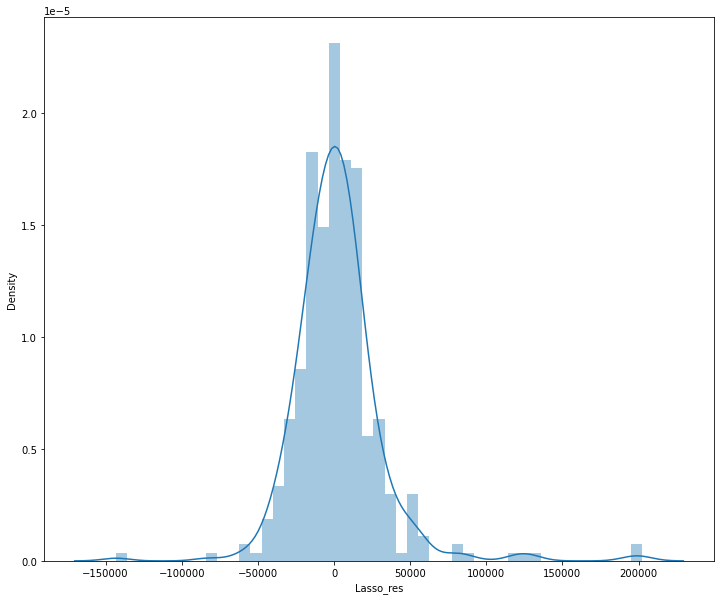

In [245]:
plt.figure(figsize = (12,10))
sns.distplot(Test_tgt.Lasso_res)

### The residuals are normally distributed around 0 with fairly constant variance, except for a slight increase for the higher values of Sale Price. 
### Nevertheless, we can conclude that Lasso regression provides us with a good model for predicting the Sale Price of houses with a regularization parameter (lambda) of 0.003.

The relevant variables and their respective weights which form a part of this model are below.

In [246]:
pd.set_option('display.max_rows', None)

In [247]:
lasso_results[abs(lasso_results.Coefficient) > 0].sort_values(by = "Coefficient",ascending = False)

Feature   Coefficient
97    Neighborhood_NoRidge  4.567960e-01
98    Neighborhood_NridgHt  4.110954e-01
24               GrLivArea  3.348254e-01
144       RoofMatl_WdShngl  2.520542e-01
127      HouseStyle_1Story  2.217692e-01
88    Neighborhood_Crawfor  1.907034e-01
103   Neighborhood_Somerst  1.569517e-01
104   Neighborhood_StoneBr  1.557789e-01
5              OverallQual  1.407815e-01
108        Condition1_Norm  1.385989e-01
212           SaleType_New  1.359358e-01
36              GarageCars  1.276444e-01
31             KitchenQual  1.093546e-01
147    Exterior1st_BrkFace  1.018784e-01
175        MasVnrType_None  9.131565e-02
77       LotConfig_CulDSac  9.075654e-02
12            BsmtExposure  8.737925e-02
25            BsmtFullBath  8.055821e-02
10                BsmtQual  7.771711e-02
8                ExterQual  7.359237e-02
56           MSSubClass_50  7.100004e-02
7               MasVnrArea  6.741588e-02
6              OverallCond  6.561763e-02
196         Functional_Typ  5.593531e-02
1                  LotArea  4.639250e-02
22                2ndFlrSF  3.769270e-02
35            GarageFinish  3.647963e-02
76         LandContour_Lvl  3.619343e-02
85    Neighborhood_BrkSide  3.519638e-02
32            TotRmsAbvGrd  2.218932e-02
37              GarageArea  2.151743e-02
13            BsmtFinType1  2.039706e-02
34             FireplaceQu  1.874474e-02
44               3SsnPorch  1.751138e-02
197      GarageType_Attchd  1.650865e-02
41              WoodDeckSF  1.465581e-02
33              Fireplaces  1.421295e-02
45             ScreenPorch  1.350007e-02
19               HeatingQC  1.271316e-02
69             MSZoning_RL  1.030830e-02
27                FullBath  7.448512e-03
171    Exterior2nd_VinylSd  4.141113e-03
74         LandContour_HLS  3.216374e-03
152    Exterior1st_MetalSd  1.662704e-03
52              Garage_Age  1.254873e-03
219  SaleCondition_Partial  1.852575e-16
51              Time_Remod -1.764771e-05
9                ExterCond -1.733070e-03
50                     Age -2.816238e-03
87    Neighborhood_CollgCr -4.200545e-03
46                PoolArea -4.273574e-03
153    Exterior1st_Plywood -7.715051e-03
168    Exterior2nd_Plywood -9.849398e-03
99    Neighborhood_OldTown -9.879851e-03
17               BsmtUnfSF -1.069216e-02
23            LowQualFinSF -1.344654e-02
130      HouseStyle_2Story -1.524956e-02
78           LotConfig_FR2 -2.108589e-02
3                    Alley -2.329358e-02
0              LotFrontage -3.069342e-02
29            BedroomAbvGr -3.197813e-02
173    Exterior2nd_Wd Shng -3.859686e-02
133        RoofStyle_Gable -3.997800e-02
64          MSSubClass_160 -4.201769e-02
70             MSZoning_RM -4.616212e-02
39              GarageCond -4.969329e-02
170     Exterior2nd_Stucco -5.196288e-02
11                BsmtCond -7.105666e-02
89    Neighborhood_Edwards -1.008490e-01
63          MSSubClass_120 -1.071845e-01
30            KitchenAbvGr -1.200360e-01
125        BldgType_TwnhsE -1.316099e-01
124         BldgType_Twnhs -1.533251e-01
118        Condition2_PosN -4.285435e-01

In [248]:
lasso_results[abs(lasso_results.Coefficient) > 0].count()

Feature        74
Coefficient    74
dtype: int64

## Model Evaluation - Ridge regression

In [249]:
# Updating dataframe with unscaled value of predicted Sale Price from Ridge regression
Test_tgt["Ridge_Predicted_SP(scaled)"] = y_testr_pred4
Test_tgt["Ridge_Predicted_SalePrice"] = Test_tgt["Ridge_Predicted_SP(scaled)"]*sd + mean
Test_tgt.head()

SalePrice  Scaled_SP  Lasso_Predicted_SP(scaled)  \
1436     120500  -0.764918                   -0.931526   
57       196500   0.201796                    0.153212   
780      176000  -0.058962                   -0.235917   
382      213500   0.418035                    0.425714   
1170     171000  -0.122562                   -0.516900   

      Lasso_Predicted_SalePrice     Lasso_res  Ridge_Predicted_SP(scaled)  \
1436              107368.416154  13131.583846                   -0.954653   
57                192685.930052   3814.069948                    0.254034   
780               162079.916562  13920.083438                   -0.146294   
382               214118.959734   -618.959734                    0.315692   
1170              139979.807530  31020.192470                   -0.524042   

      Ridge_Predicted_SalePrice  
1436              105549.403269  
57                200615.893174  
780               169129.009991  
382               205465.415574  
1170              139418.084759

In [250]:
# Calculating r2 score again as a sanity check
print("Ridge r2_score for test data: ",round(r2_score(y_true=Test_tgt.SalePrice,y_pred=Test_tgt["Ridge_Predicted_SalePrice"]),4))

Ridge r2_score for test data:  0.8503


#### Once again, this is the same r2 score we had seen for our Ridge Regression with lambda = 3.0

In [251]:
# Evaluating residuals
Test_tgt["Ridge_res"] = Test_tgt["SalePrice"] - Test_tgt["Ridge_Predicted_SalePrice"]
Test_tgt.head()

SalePrice  Scaled_SP  Lasso_Predicted_SP(scaled)  \
1436     120500  -0.764918                   -0.931526   
57       196500   0.201796                    0.153212   
780      176000  -0.058962                   -0.235917   
382      213500   0.418035                    0.425714   
1170     171000  -0.122562                   -0.516900   

      Lasso_Predicted_SalePrice     Lasso_res  Ridge_Predicted_SP(scaled)  \
1436              107368.416154  13131.583846                   -0.954653   
57                192685.930052   3814.069948                    0.254034   
780               162079.916562  13920.083438                   -0.146294   
382               214118.959734   -618.959734                    0.315692   
1170              139979.807530  31020.192470                   -0.524042   

      Ridge_Predicted_SalePrice     Ridge_res  
1436              105549.403269  14950.596731  
57                200615.893174  -4115.893174  
780               169129.009991   6870.990009  
382               205465.415574   8034.584426  
1170              139418.084759  31581.915241

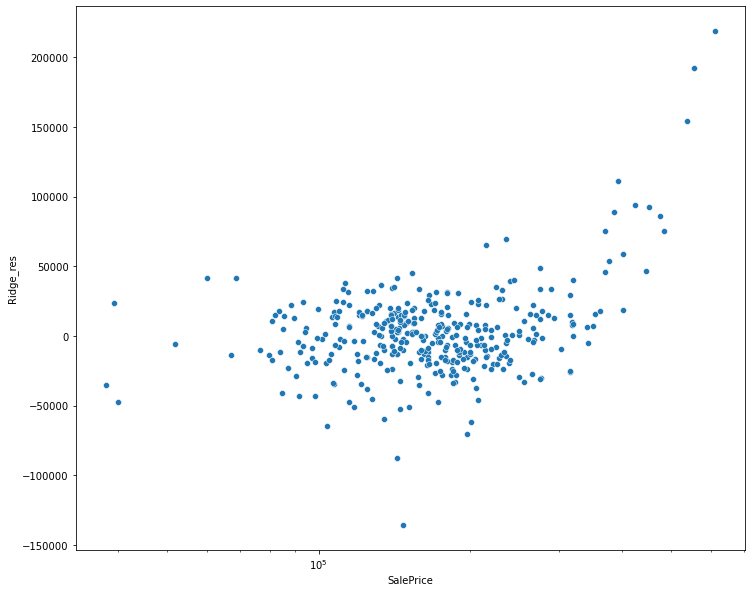

In [252]:
plt.figure(figsize = (12,10))
sns.scatterplot(x=Test_tgt.SalePrice,y=Test_tgt.Ridge_res)
plt.xscale("log")

<AxesSubplot:xlabel='Ridge_res', ylabel='Density'>

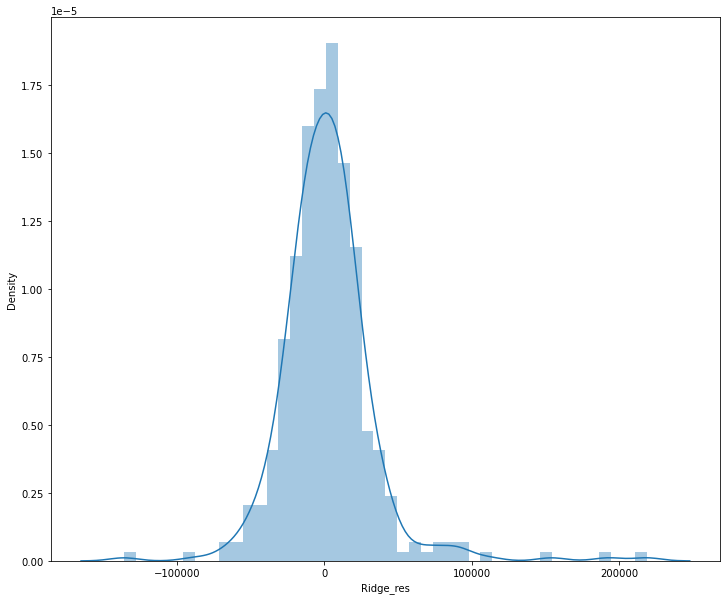

In [253]:
plt.figure(figsize = (12,10))
sns.distplot(Test_tgt.Ridge_res)

### As with Lasso, the residuals for Ridge are normally distributed around 0 with fairly constant variance, except for a very slight increase for the higher values of Sale Price. 
### Nevertheless, we can conclude that Ridge regression also provides us with a decent model for predicting the Sale Price of houses with a regularization parameter (lambda) of 3.0.

The relevant variables and their respective weights which form a part of this model are below.

In [254]:
ridge_results2[abs(ridge_results2.Coefficient) > 0].sort_values(by = "Coefficient",ascending = False)

Feature  Coefficient
57       RoofMatl_WdShngl     0.739055
32   Neighborhood_NridgHt     0.575085
31   Neighborhood_NoRidge     0.490822
71          GarageType_NA     0.354964
34   Neighborhood_StoneBr     0.349343
22        LandContour_Low     0.337254
21        LandContour_HLS     0.309143
28   Neighborhood_Crawfor     0.294715
33   Neighborhood_Somerst     0.259273
4                2ndFlrSF     0.259095
61    Exterior2nd_ImStucc     0.256668
35   Neighborhood_Veenker     0.243746
6            BsmtFullBath     0.216488
38        Condition1_RRAn     0.214763
26          LandSlope_Sev     0.212558
51       RoofMatl_CompShg     0.209379
3                1stFlrSF     0.207613
36        Condition1_Norm     0.204205
73           SaleType_CWD     0.197866
24      LotConfig_CulDSac     0.194165
74           SaleType_Con     0.186202
23        LandContour_Lvl     0.180855
60    Exterior1st_WdShing     0.170371
27    Neighborhood_BrDale     0.168583
70         Functional_Typ     0.167426
1             OverallQual     0.165392
10             GarageCars     0.164787
40        Condition2_Norm     0.160436
47      HouseStyle_1Story     0.155716
79  SaleCondition_Partial     0.150561
76           SaleType_New     0.150561
17            MSZoning_RH     0.150279
7            BsmtHalfBath     0.148323
5               GrLivArea     0.146737
0               Utilities     0.144097
58    Exterior1st_BrkFace     0.143353
18            MSZoning_RL     0.135824
41        Condition2_PosA     0.130171
72       MiscFeature_Othr     0.127890
9             KitchenQual     0.126819
46      HouseStyle_1.5Unf     0.121222
77            SaleType_WD     0.119274
2               ExterQual     0.114828
52       RoofMatl_Membran     0.107351
55       RoofMatl_Tar&Grv     0.104221
37        Condition1_PosA     0.103673
75         SaleType_ConLD     0.100796
30   Neighborhood_NPkVill     0.095060
67       Electrical_FuseP     0.089940
39       Condition2_Feedr     0.088879
54          RoofMatl_Roll     0.079263
16            MSZoning_FV     0.073119
19            MSZoning_RM     0.071818
43        Condition2_RRAn     0.063111
11             GarageQual     0.053095
66           Heating_Wall     0.052070
44        Condition2_RRNn     0.049188
53         RoofMatl_Metal     0.025439
56       RoofMatl_WdShake    -0.021531
12          MSSubClass_40    -0.027832
25          LotConfig_FR3    -0.059229
64        Foundation_Wood    -0.072609
13          MSSubClass_45    -0.078603
45         BldgType_Twnhs    -0.118584
50      HouseStyle_2Story    -0.119228
48      HouseStyle_2.5Fin    -0.139450
29   Neighborhood_Edwards    -0.143221
68        Functional_Maj2    -0.146497
78   SaleCondition_Family    -0.148140
59    Exterior1st_ImStucc    -0.163073
49      HouseStyle_2.5Unf    -0.166712
69         Functional_Sev    -0.191160
20           LotShape_IR3    -0.216162
15         MSSubClass_160    -0.221225
63    Exterior2nd_Wd Shng    -0.264861
14         MSSubClass_120    -0.269843
8            KitchenAbvGr    -0.309648
62     Exterior2nd_Stucco    -0.339460
65           Heating_OthW    -0.352579
42        Condition2_PosN    -0.808144

In [255]:
ridge_results2[abs(ridge_results2.Coefficient) > 0].count()

Feature        80
Coefficient    80
dtype: int64

#### Since we had performed recursive feature elimination and selected 80 features for use in Ridge regression, these are different from the ones we observed with Lasso

## Final Model

### Now, we have two possible models available, one using Lasso Regression, and the other using Ridge Regression. Both of their performances with the chosen optimal regularization parameters are quite similar with r2 scores of 0.867 for Lasso and 0.850 for Ridge.

### Best Lasso regression is with alpha (or lambda) = 0.003, and 74 features
### Best Ridge regression is with alpha (or lambda) = 3.0, and 80 features
### Both the models also perform well when we check the residuals to see if the assumptions of Linear Regression hold or not.

### We see that Lasso regression performs an inherent feature selection and has selected 74 variables on its own. Ridge regression on the other hand does not perform any feature selection and depends on other processes such as Recursive Feature Elimination(RFE). As such, the initial estimate of "alpha" for Ridge regression was 30.0 with all variables included. This reduced to 3.0 when 80 variables (out of 220) were selected by RFE. This indicates that for Ridge regression, the value of alpha is dependent on which features are available.

### Hence, it is more suitable to use a Lasso Regression model which performs a feature selection on its own while simultaneously testing for a suitable regularization parameter (alpha)

## New Lasso model assuming the top 5 features in the original Lasso model not available

#### The 5 most important features identified by Lasso regression are:
- Neighborhood_NoRidge 	4.567960e-01
- Neighborhood_NridgHt 	4.110954e-01
- GrLivArea             3.348254e-01
- RoofMatl_WdShngl 	    2.520542e-01
- HouseStyle_1Story 	2.217692e-01

In [256]:
X_train.head()

LotFrontage   LotArea  Street  Alley  Utilities  OverallQual  \
774     1.834469  0.374287       1      0          3            8   
92      0.465680  0.287676       1      1          3            5   
360    -0.036209 -0.294393       1      0          3            6   
549     0.237548 -0.110871       1      0          3            7   
546     0.009417 -0.174679       1      0          3            6   

     OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
774            5    1.463860          4          3         4         3   
92             7   -0.564141          3          4         4         3   
360            6   -0.564141          3          3         4         3   
549            5   -0.564141          4          3         4         3   
546            7   -0.564141          3          3         4         3   

     BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
774             3             1   -0.975089             1    -0.29356   
92              1             5    0.568185             1    -0.29356   
360             3             6    0.698054             1    -0.29356   
549             1             1   -0.975089             1    -0.29356   
546             1             3   -0.325745             1    -0.29356   

     BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  \
774   3.075155     1.924341          4           1  2.039060 -0.795226   
92   -0.893279    -0.411114          5           1 -0.512031 -0.795226   
360  -1.000776    -0.384650          5           1 -0.643504 -0.795226   
549   0.784123    -0.331721          5           1 -0.643504  1.911626   
546   0.454914     0.005696          5           1 -0.635919  0.853618   

     LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
774     -0.120158   0.858221             0             0         2         0   
92      -0.120158  -1.050668             1             0         1         0   
360     -0.120158  -1.149045             1             0         1         0   
549     -0.120158   1.087137             0             0         2         1   
546     -0.120158   0.218772             0             0         1         1   

     BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
774             3             1            4             9           1   
92              2             1            3             5           0   
360             2             1            3             5           1   
549             4             1            4             8           1   
546             3             1            3             6           1   

     FireplaceQu  GarageFinish  GarageCars  GarageArea  GarageQual  \
774            4             3           3    1.999667           3   
92             0             1           2   -0.190953           3   
360            3             2           2   -0.011161           3   
549            4             3           2    0.674886           3   
546            4             1           2   -0.153102           3   

     GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
774           3           2    1.770604    -0.024215      -0.371741   
92            3           2   -0.746192    -0.709184       0.318877   
360           3           2   -0.746192    -0.709184      -0.371741   
549           3           2    0.707957     2.061133      -0.371741   
546           3           2   -0.746192    -0.130766      -0.371741   

     3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence   MiscVal  Age  \
774  -0.120776    -0.270551 -0.060152       0      0 -0.083079    1   
92   -0.120776    -0.270551 -0.060152       0      0 -0.083079   88   
360  -0.120776     3.560822 -0.060152       0      3 -0.083079   29   
549  -0.120776    -0.270551 -0.060152       0      0 -0.083079    6   
546   4.449408    -0.270551 -0.060152       0      0 -0.083079   84   

     Time_Remod  Garage_Age  MSSubClass_30  MSSubClass_40  M

In [257]:
X_train.shape

(1095, 220)

In [258]:
X_test.shape

(365, 220)

In [259]:
# List of top 5 Lasso features
top_5_lasso_features = ["Neighborhood_NoRidge","Neighborhood_NridgHt","GrLivArea","RoofMatl_WdShngl",
                        "HouseStyle_1Story"]

In [260]:
X_train_new = X_train.drop(top_5_lasso_features,axis=1)
X_train_new.shape

(1095, 215)

In [261]:
X_test_new = X_test.drop(top_5_lasso_features,axis=1)
X_test_new.shape

(365, 215)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


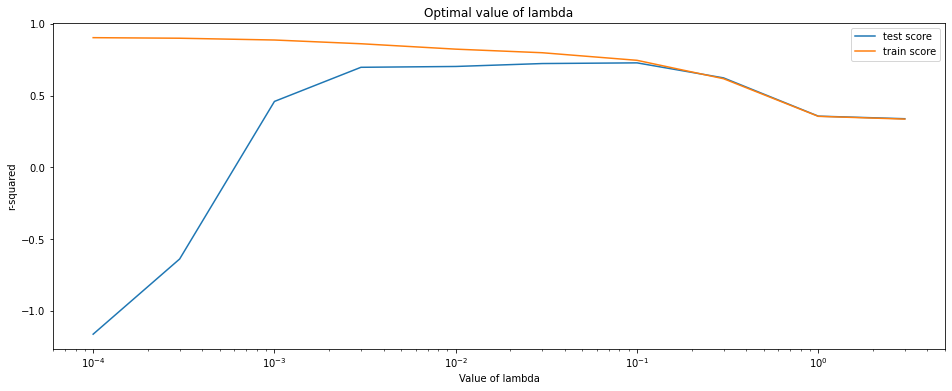

In [262]:
# creating a KFold object with 10 splits
las_new_folds = KFold(n_splits=10,shuffle=True,random_state=100)

# Defining hyperparameter values to be used for tuning 
hyper_param = {'alpha':[0.0001,0.0003,0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}

# Initating a Lasso Regression object
las_new = Lasso()

# Performing Grid Search cross-validation to find optimal value of alpha
las_new_cv = GridSearchCV(estimator = las_new,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=las_new_folds,
                        verbose=1,
                        return_train_score=True
                       )

las_new_cv.fit(X_train_new,y_train)

# cv results
las_new_res = pd.DataFrame(las_new_cv.cv_results_)
#las_res

# plotting Lasso cv results
plt.figure(figsize=(16,6))

plt.plot(las_new_res["param_alpha"], las_new_res["mean_test_score"])
plt.plot(las_new_res["param_alpha"], las_new_res["mean_train_score"])
plt.xlabel('Value of lambda')
plt.ylabel('r-squared')
plt.xscale("log")
plt.title("Optimal value of lambda")
plt.legend(['test score', 'train score'], loc='upper right')

In [263]:
las_new_cv.best_params_

{'alpha': 0.1}

In [272]:
las_new2 = Lasso(alpha=0.003)
las_new2.fit(X_train_new,y_train)

y_train_pred_new = las_new2.predict(X_train_new)
print("Train r2_score: ", r2_score(y_true=y_train,y_pred=y_train_pred_new))

y_test_pred_new  = las_new2.predict(X_test_new)
print("Test r2_score: ",r2_score(y_true=y_test,y_pred=y_test_pred_new))

Train r2_score:  0.8536680224111268
Test r2_score:  0.8567276249526605


#### The r2 scores above show that the model performs well with unseen test data as well and since the scores are fairly similar, we can conclude that overfitting and thereby variance in the model has been adequately minimized, while also not allowing the bias to be very high.

#### Once again, the regularization parameter (alpha/lambda) of 0.003 is indicative of the best possible model.

### Consolidating Lasso regression model and coefficients

In [266]:
lasso_new_results = pd.DataFrame(list(zip(X_train_new.columns,las_new2.coef_)))
lasso_new_results.columns = ["Feature","Coefficient"]
print("Number of features selected by Lasso: ",lasso_new_results[abs(lasso_new_results.Coefficient) > 0].count())

print("Top 10 variables as per new Lasso Regression affecting target variable")
lasso_new_results[abs(lasso_new_results.Coefficient) > 0].sort_values(by = "Coefficient",ascending = False).head(10)

Number of features selected by Lasso:  Feature        78
Coefficient    78
dtype: int64
Top 10 variables as per new Lasso Regression affecting target variable


Feature  Coefficient
22               2ndFlrSF     0.266028
21               1stFlrSF     0.260142
105       Condition1_Norm     0.167639
5             OverallQual     0.150971
35             GarageCars     0.135073
207          SaleType_New     0.132391
87   Neighborhood_Crawfor     0.119118
8               ExterQual     0.116913
142   Exterior1st_BrkFace     0.108739
30            KitchenQual     0.105863

### Model Evaluation of new Lasso regression

      SalePrice  Scaled_SP  Lasso_Predicted_SP(scaled)  \
1436     120500  -0.764918                   -0.904912   
57       196500   0.201796                    0.211317   
780      176000  -0.058962                   -0.311451   
382      213500   0.418035                    0.460483   
1170     171000  -0.122562                   -0.589468   

      Lasso_Predicted_SalePrice  
1436              109461.664838  
57                197256.069176  
780               156138.944021  
382               216853.621349  
1170              134272.141060  
Lasso r2_score for test data:  0.8568


<AxesSubplot:xlabel='Lasso_res', ylabel='Density'>

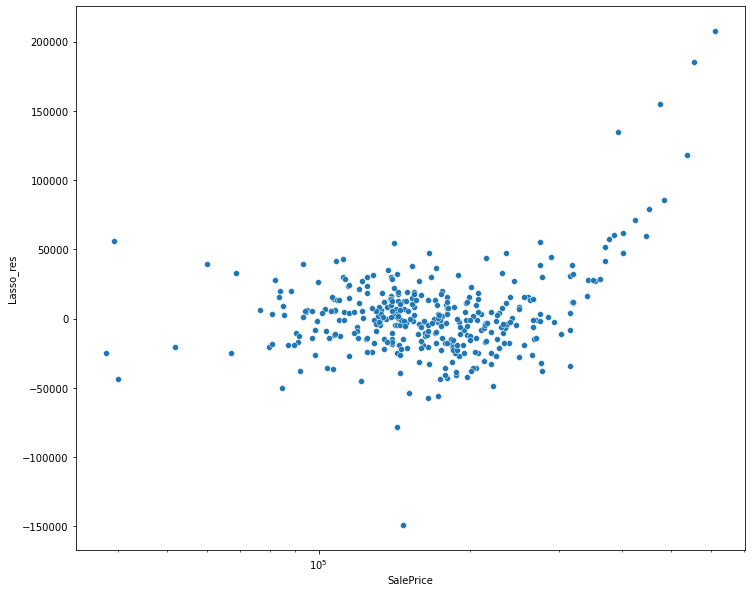

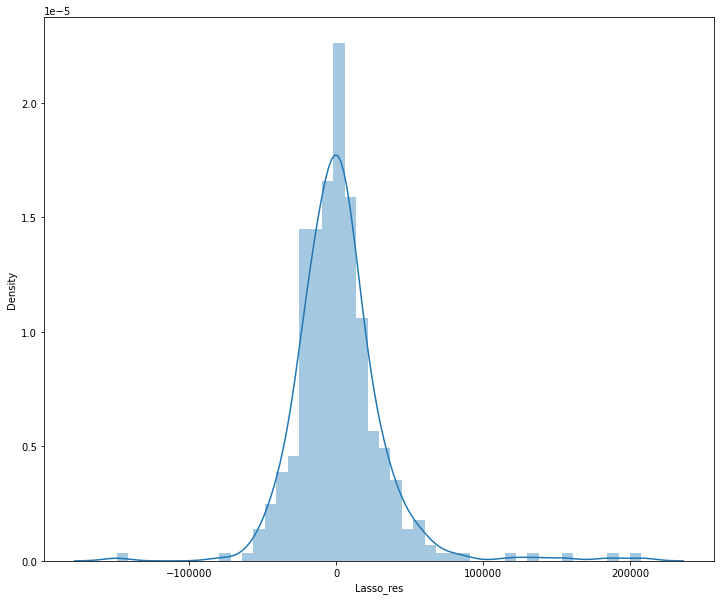

In [273]:
# Creating a dataframe of original and predicted target variable
Test_tgt_new = pd.DataFrame({"SalePrice":y_test_orig,"Scaled_SP":y_test,"Lasso_Predicted_SP(scaled)":y_test_pred_new})

# Updating dataframe with unscaled value of predicted Sale Price
Test_tgt_new["Lasso_Predicted_SalePrice"] = Test_tgt_new["Lasso_Predicted_SP(scaled)"]*sd + mean
print(Test_tgt_new.head())

# Calculating r2 score again as a sanity check
print("Lasso r2_score for test data: ",round(r2_score(y_true=Test_tgt_new.SalePrice,y_pred=Test_tgt_new["Lasso_Predicted_SalePrice"]),4))

# Evaluating residuals
Test_tgt_new["Lasso_res"] = Test_tgt_new["SalePrice"] - Test_tgt_new["Lasso_Predicted_SalePrice"]

plt.figure(figsize = (12,10))
sns.scatterplot(x=Test_tgt_new.SalePrice,y=Test_tgt_new.Lasso_res)
plt.xscale("log")

plt.figure(figsize = (12,10))
sns.distplot(Test_tgt_new.Lasso_res)

#### Hence, this new model also uses an optimal alpha value of 0.003. However, there has been some change in the top 5 features as compared to features 6-10 in the original model.
#### In addition, there are now 78 relevant features identified by Lasso regression. Some of these additional variables added in the new model may have been collinear with our original top 5 variables and hence had been discarded earlier.